<h1><center>Исследование данных о продажах видеоигр</center></h1>

# Цель проекта

**Основной целью проекта является установление параметров, определяющих успешность игры для того, чтобы спрогнозировать продажи и рекламные кампании на следующий 2017 год.**

Кроме того, в ходе проекта необходимо детально изучить:
- Как менялись продажи по платформам по годам;
- За какой характерный период появляются новые и исчезают старые платформы;
- Выявить платформы, лидирующие по продажам;
- Определить как влияют оценки критиков и пользователей на продажи;
- Распределение продаж игр по жанрам.

Составить портрет пользователя в Северной Америке, Европе и Японии. Для этого необходимо определить предпочтения пользователей по платформам и жанрам. Проверить влияет ли рейтинг ESRB на продажи в различных регионах.

Проверить гипотезы:
- Средние пользовательские рейтинги платформ XBox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports разные.

# Описание данных

Таблица с данными о продажах игр в Северной Америке, Европе и Японии.
Название и описание столбцов:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение общей информации о данных

Для начала импортируем все необходимые библиотеки и сделаем настройку графиков.

In [ ]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [ ]:
# настройка графиков

# улучшение чёткости изображения
%config InlineBackend.figure_format = 'retina'

# настройка шрифтов заголовков и подписей для графиков
large = 16; med = 14; small = 12
params = {'axes.titlesize': large,
          'axes.titleweight': 'bold',
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          'figure.titleweight': 'bold'}
plt.rcParams.update(params)
plt.style.use('seaborn-bright')

Считаем исходный csv-файл и сохраним их переменной df. Затем сделаем предварительный просмотр данных и с помощью метода info() узнаем основные характеристики исходных датасетов.

In [ ]:
# сохранение данных о пользователе в переменной df и просмотр 10 случайных строчек
df = pd.read_csv('/datasets/games.csv')
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11102,Arslan: The Warriors of Legend,PS4,2015.0,Action,0.03,0.01,0.04,0.01,69.0,6.6,T
4760,Naughty Bear,X360,2010.0,Action,0.21,0.15,0.00,0.04,43.0,5.6,T
16189,Major Dream: Major Wii Nagero! Gyroball!!,Wii,2008.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN
9597,NBA 2K13,WiiU,2012.0,Sports,0.07,0.04,0.00,0.01,85.0,7,E
8160,K-1 World Grand Prix,PS2,2002.0,Sports,0.04,0.03,0.10,0.01,67.0,9,T
6028,FIFA Soccer 13,3DS,2012.0,Action,0.06,0.20,0.00,0.03,68.0,3.7,E
8246,True Crime: New York City,GC,2005.0,Action,0.13,0.03,0.00,0.00,59.0,8.8,M
3153,Onimusha: Dawn of Dreams,PS2,2006.0,Action,0.15,0.12,0.34,0.04,81.0,8.9,M
10157,The Settlers,DS,2007.0,Action,0.10,0.00,0.00,0.01,39.0,5.6,E
6100,Dragon Ball Z: Budokai Tenkaichi 2,Wii,2006.0,Fighting,0.24,0.03,0.00,0.02,72.0,8.5,T


In [ ]:
# просмотр общей информации о датафрейме методом info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 16715 строк и 11 столбца. Сохраним начальное количество строк и столбцов в переменных rows_initial и columns_initial для того, чтобы проверить насколько изменится размер датафрейма в конце данного исследования.

In [ ]:
# сохранение количества строк и столбцов в переменных rows_initial и columns_initial
rows_initial = df.shape[0]
columns_initial = df.shape[1]

<u>Выводы по первоначальному обзору данных в датафрейме **df**</u>

- Необходимо привести названия столбцов к нижнему регистру.
- Необходимо поменять типы данных в столбцах Year_of_Release,  Critic_Score, User_Score.
- Возможны неявные дубликаты в столбцах Name, Platform, Genre.
- В таблице 16715 строчек и 11 столбцов.
- Пропуски есть в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.


## Предобработка данных

Этап предобработки данных необходим для подготовки данных для их более корректого анализа.
Он включает в себя следующие пункты:
- переименование названий столбцов;
- обработка дубликатов;
- преобразование типов данных при необходимости;
- обработка пропусков.

### Переименование названий столбцов

Как было выявлено при первичном обзоре данных, необходимо привести названия столбцов к нижнему регистру. Для этого воспользуемся методом str.lower(), применив его к названиям столбцов, полученных методом columns.

In [ ]:
# приведение названий столбцов к нижнему регистру и просмотр результата
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка дубликатов

Проверим есть ли дублирующиеся строчки в исходном датафрейме методом duplicated() и подсчитаем их количество методом sum().

In [ ]:
# подсчет количества дублирующихся строчек методом sum()
df.duplicated().sum()

0

Дублирующихся строчек нет.
Проверим есть ли неявные дубликаты или аномальные значения в столбцах 'name', 'platform', 'genre', 'critic_score', 'user_score', 'rating'. Для этого создадим список со названиями столбцов, в которых нужно проверить уникальные значения и с помощью цикла переберём каждый столбец.

In [ ]:
# список столбцов, в которых необходимо проверить дубликаты и аномалии
list = ['name', 'platform', 'genre', 'critic_score', 'user_score', 'rating']

# цикл для вывода на экран уникальных значений каждого столбца из списка
for c in list:
    print(f'Столбец {c}: {df[c].unique()} \n')

Столбец name: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica'] 

Столбец platform: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 

Столбец genre: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan] 

Столбец critic_score: [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.] 

Столбец user_score: ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '

На первый взгляд нет одинаковых названий, написанных разными регистрами, либо в другой формулировке. Проверим есть ли дубликаты в столбцах name, platform, year_of_release. Для этого сделаем срез данных с помощью атрибута loc и применим метод duplicated().

In [ ]:
# проверка дубликатов в столбцах name, platform, year_of_release
df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Выяснилось, что в исходных данных присутствуют дубликаты, соответствующие игре Madden NFL 13. У них разные значения продаж, поэтому эти строчки не были обнаружены при поиске явных дубликатов. Возможно исходные данные были собраны из нескольких источников, поэтому получилась разная величина продаж для одной игры.
Строчки с пропущенными значениями в столбце name будут удалены на следующем шаге.

Удалим обнаруженные дубликаты методом drop_duplicates, передав параметру subset названия столбцов name, platform, year_of_release. Примем, что верные значения продаж записаны первыми, поэтому укажем keep='first'. И затем сбросим индексы строк методом reset_index() c параметром drop, равным True.

In [ ]:
# удаление дубликатов в столбцах name, platform, year_of_release методом drop_duplicates()
# оставим первые вхождения, указав keep='first'
# сброс индексов методом reset_index()

df = df.drop_duplicates(
    subset=['name', 'platform', 'year_of_release'],
    keep='first') \
    .reset_index(drop=True)

In [ ]:
# проверка удаления дубликатов в игре Madden NFL 13
df.query("name == 'Madden NFL 13'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E


Дубликаты в столбцах name, platform, year_of_release удалены. Аномальных значений в столбцах 'critic_score' и 'user_score' нет: значения в critic_score находятся в диапазоне 0-100, user_score - 0-10 как и должно быть.

В столбце user_score есть значение tbd, которое означает to be determined, т.е. то что еще надо определить. Из-за присутствия этого значения в столбце, его тип object и поэтому с ним не получится производить математические операции и строить графики. Для того, чтобы решить эту проблему в следующем этапе преобразуем тип данных с помощью метода to_numeric и укажем параметр errors='coerce'. Таким образом, все значения tbd заменятся нулевыми значениями вещественного типа NaN.

В столбце rating содержится информация о рейтинге ассоциации ESRB, которая определяет наиболее подходящую возрастную категорию для игры. Всего существует 6 категорий:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается» - Продукт был отправлен в ESRB и ожидает присвоения рейтинга.
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M».
В нашем датасете имеется еще категория К-А - это устаревшая категория  ("Kids to Adults"), которая после 1998 года была переименована в E, поэтому заменим К-А на Е.

In [ ]:
# просмотр строчек, содержащих tbd в столбце user_score
df.query("user_score == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16693,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16695,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16696,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16702,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Строчек, содержащих значение tbd значительное количество - 2424, необходимо заменить их нулевыми значениями.

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
# замена устаревшей категории К-А в столбце rating методом str.replace()
df['rating'] = df['rating'] \
    .str.replace('K-A', 'E')

### Преобразование типов данных

В ходе анализа результатов выполнения метода info() были обнаружены столбцы, в которых необходимо провести преобразование типа данных:
- **year_of_release** из float64 в int64;
- **critic_score** из float64 в int64;
- **user_score** из object в float64.

Некорректные типы данных могли возникнуть при их автоматическом распознавании в ходе считывания исходной таблицы.

Заменим тип данных с помощью метода astype().

In [ ]:
# замена типа данных в ненулевых значениях столбца year_of_release в тип int методом astype()
df['year_of_release'] = df.loc[~df['year_of_release'].isna(), 'year_of_release'].astype(int)

In [ ]:
# замена типа данных в ненулевых значениях столбца critic_score в тип int методом astype()
df['critic_score'] = df.loc[~df['critic_score'].isna(), 'critic_score'].astype(int)

In [ ]:
# приведение данных к числовому типу методом to_numeric
# параметр errors='coerce' принудительно заменит некорректные значения на NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [ ]:
# проверка типов данных
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Типы данных заменились. Для year_of_release и critic_score отображается тип float64 за счет присутствия нулевых значений вещественного типа.

### Обработка пропусков

Для того, чтобы узнать в каких столбцах есть пропуски и какова их доля, воспользуемся комбинацией методов isna() и mean().

In [ ]:
# подсчёт доли пропущенных значений в общем объёме данных комбинацией методов isna() и mean()
temp = df.copy()
display(pd.DataFrame(round((temp.isna().mean()*100),2), columns=['NaNs, %'])
        .style.format( '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
name,0.01
platform,0.00
year_of_release,1.61
genre,0.01
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.32
user_score,54.59


Пропуски присутствуют в 6 столбцах: name, year_of_release, genre, critic_score, user_score, rating.

Пропусков в столбцах **name и genre** небольшое количество - 0.01%. Пропуски в этих столбцах могут быть вызваны технической ошибкой, когда при выгрузке/загрузке произошла утеря. Т.к. пропусков очень мало относительно общего объёма информации, можно удалить эти строчки.

В столбце **year_of_release** пропусков 1.6%, это также небольшое значение, и их можно удалить.  Эти пропуски также могли возникнуть в результате технической ошибки, либо из-за человеческого фактора.

В столбцах **critic_score, user_score и rating** имеется большое количество (40-55%) пропущенных значений. Удаление этих значений сильно повлияет на результат работы, поэтому необходимо их заполнить.  Пропуски в этих столбцах заполним числовым значением -999, которое легко отфильтровать и которое не повлияет на общую статистику по этим столбцам.

В столбце **rating** записаны категориальные переменные, определяющие возрастную категорию игроков. Пропуски могут означать, что категорию еще не присвоили, т.е. это может быть «RP» или «RP 17+». Но также возможно, что поскольку организация ESRB определяет рейтинги для видеоигр и другого развлекательного программного обеспечения в США и Канаде, возможно некоторые из представленных видеоигр были разработы в других государствах и поэтому не имеют рейтинг ESRB. Также возможна и техническая причина отсутствия этих данных. Так как невозможно восстановить или определить реальное значение в этом столбце, лучше заполнить пропуски значением "unknown".

#### Удаление пропусков в столбцах name и genre

Удалим пропуски в столбцах name и genre и year_of_release. Сделаем это одной строкой, передав параметру subset метода dropna названия этих столбцов.

In [ ]:
# удаление нулевых значений в столбцах name и genre методом dropna()
df = df.dropna(subset=['name', 'genre', 'year_of_release'])

#### Заполнение пропусков в столбце critic_score и user_score

Заполним все строчки с пропусками в столбцах critic_score и user_score значением -999.

In [ ]:
# заполнение пропусков в столбце critic_score и user_score значением -999
df['critic_score'] = df['critic_score'].fillna(-999)
df['user_score'] = df['user_score'].fillna(-999)

#### Заполнение пропусков в столбце rating

Как было ранее описано, в столбце rating имеется большое количество пропусков, соответственно их нельзя удалить. Также их невозможно вычислить численными методами, т.к. это категориальные переменные, поэтому заполним пропуски значением unknown, передав его методу fillna().

In [ ]:
# заполнение пропусков в столбце rating значением unknown
df['rating'] = df['rating'].fillna('unknown')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-999.0,-999.0,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-999.0,-999.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-999.0,-999.0,unknown
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-999.0,-999.0,unknown
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-999.0,-999.0,unknown
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-999.0,-999.0,unknown


#### Создание столбца с суммарными продажами

Для дальнейшего анализа пригодится столбец с суммарными продажами по всем регионам.

In [ ]:
# создание столбца с суммарными продажами
df['total_sales'] = df.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

#### Проверка изменения размерности таблицы

Для того, чтобы убедиться, что существенный объем информации не был утерян, проверим финальную размерность таблицы после проведенной чистки.

In [ ]:
# сохранение финального количества строк и столбцов в переменных rows_final и columns_final
rows_final = df.shape[0]
columns_final = df.shape[1]

# подсчёт величины изменения размеров датафрейма относительно начала проекта
rows_diff = (rows_initial - rows_final) / rows_initial
print(f'Количество строк уменьшилось на {rows_diff:.2%}')

columns_diff = (columns_final - columns_initial) / columns_final
print(f'Количество столбцов увеличилось на {columns_diff:.1%}')

Количество строк уменьшилось на 1.63%
Количество столбцов увеличилось на 8.3%


Количество строк уменьшилось незначительно.

**Вывод по этапу предобработки данных:**

- Названия столбцов были приведены к нижнему регистру.
- Явные и неявные дубликаты не были обнаружены.
- Устаревшая категории К-А в столбце rating была заменена на "Е"
- Были преобразованы типы столбцов year_of_release, critic_score и user_score
- Были обнаружены пропуски в 6 столбцах: name, year_of_release, genre, critic_score, user_score, rating.
- Пропусков в столбцах name и genre было незначительное количество (0.01%), поэтому они были удалены
- Пропуски в столбце year_of_release были восстановлены исходя из игр, по которым известен год выпуска
- Пропуски в столбцах critic_score и user_score были заполнены медианным значением, рассчитанным исходя из типа платформы
- Пропуски в столбце rating были заполнены значением unknown
- Был создан дополнительный столбцек с суммарными продажами по всем регионам
- Была проведена проверка изменения размерности таблицы. Количество строк уменьшилось незначительно - на 0.01%.

In [ ]:
# посмотрим, что осталось
temp = df.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-

## Исследовательский анализ данных

### Как менялись продажи по платформам?

Для того, чтобы ответить на этот вопрос необходимо подсчитать суммарное количество всех проданных копий для каждой платформы. Сгруппируем данные по столбцу platform методом groupby(). Затем создадим столбец sum_platform_sales с суммарным количеством проданных копий. Также добавим столбец count, в котором сохраним количество игр, выпущенных на этой платформе. Для удобства анализа полученной таблицы, отсортируем даннные по убыванию суммарных продаж по платформе методом sort_values().

In [ ]:
# группировка данных по типу платформы
# подсчет суммарных продаж игр на каждой платформе (столбец sum_platform_sales)
# подсчет количества игр на данной платформе (столбец count)
# сортировка по убыванию значений столбца sum_total_sales методом sort_values()
df.groupby(['platform']).agg(
                            sum_platform_sales = ('total_sales','sum'),
                            count = ('name', 'count')) \
    .sort_values(by='sum_platform_sales', ascending=False)

,sum_platform_sales,count
platform,,
PS2,1233.56,2127
X360,961.24,1232
PS3,931.33,1305
Wii,891.18,1286
DS,802.78,2121
PS,727.58,1190
PS4,314.14,392
GBA,312.88,811
PSP,289.53,1193


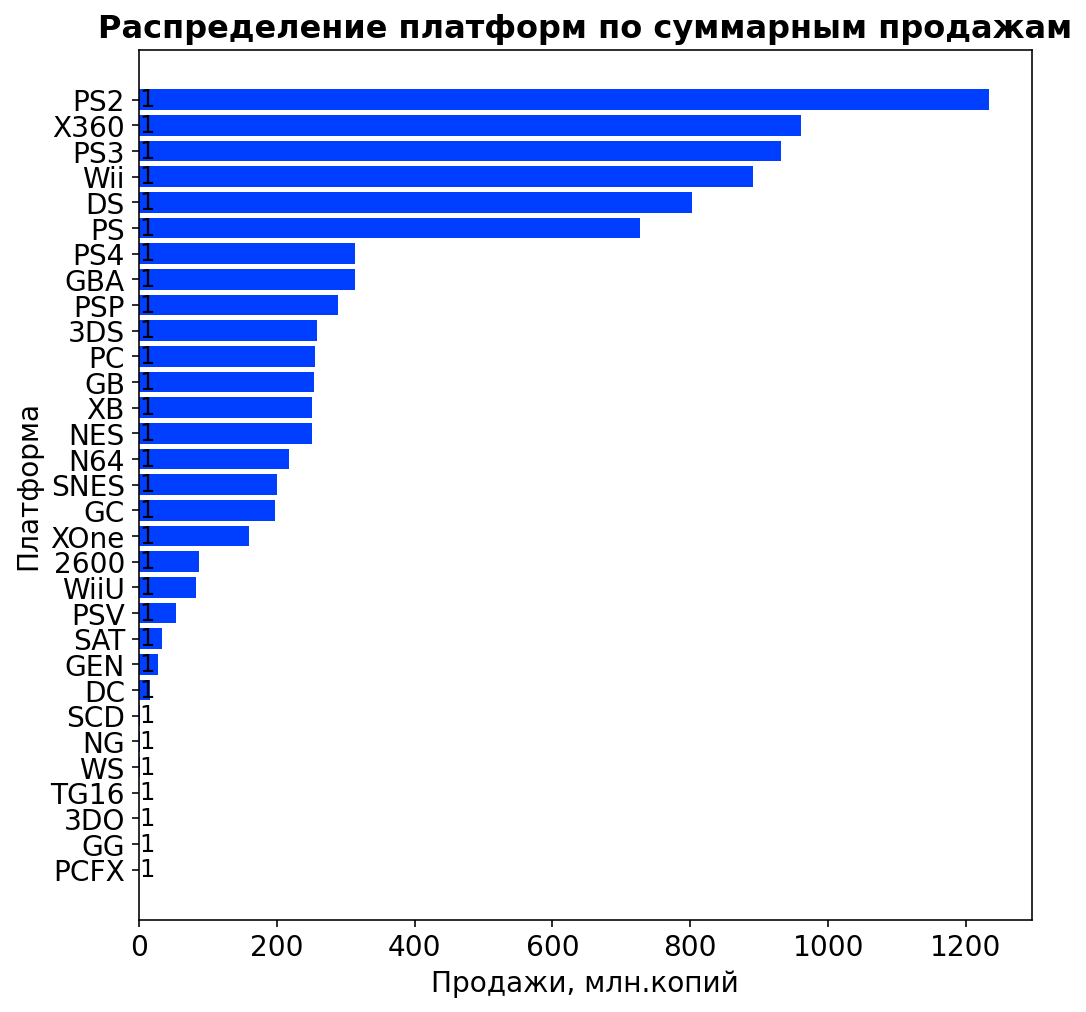

In [ ]:
# подсчёт суммарных продаж по каждой платформе
# сортировка полученного датафрейма по возрастанию методом sort_values()
platform_sales = df.groupby(['platform']).agg(
                            sum_platform_sales = ('total_sales','sum'),
                            count = ('name', 'count'))\
    .sort_values(by='sum_platform_sales')

# создание горизонтальной столбчатой диаграммы с помощью библиотеки matplotlib методом barh()
fig, ax = plt.subplots(figsize=(8,8))

bars = plt.barh(platform_sales.index, platform_sales['sum_platform_sales'])

plt.title("Распределение платформ по суммарным продажам", fontsize=16, fontweight="bold")
plt.xlabel("Продажи, млн.копий", fontsize=14)
plt.ylabel("Платформа", fontsize=14)

plt.show()

Из полученной таблицы и столбчатой диаграммы видно, что 6 платформ отмечаются наибольшими продажами: PS2, X360, PS3, Wii, DS, PS от 730.86 до 1255.77 млн копий. Эти же платформы характеризуются и наибольшим количеством выпущенных на них игр. За исключением платформы PSP, на которой выпущено 1209 игр, но продажи по ним равны 294.05 млн. копий.

Выясним как менялись продажи по платформам с наибольшими продажами по годам. Добавим названия интересующих платформ в список. С помощью метода query() проверим вхождение названий платформ в этот список и сделаем по ним срез. затем создадим сводную таблицу, где каждому году соответствует суммарная величина продаж по каждой платформе. Если продаж за этот год не было в ячейке будет нулевое значение. Посмотрим на таблицу, а потом визуализируем её в виде графика.

In [ ]:
# список платформ с наибольшими продажами
top_sales_platforms_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

# срез данных по платформам, входящим в список с наибольшими продажами
# создание сводной таблицы, сгруппированной по годам
top_sales_platforms = df.query("platform in @top_sales_platforms_list") \
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top_sales_platforms

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,6.03,NaN,NaN,NaN,NaN
1995.0,NaN,35.96,NaN,NaN,NaN,NaN
1996.0,NaN,94.70,NaN,NaN,NaN,NaN
1997.0,NaN,136.17,NaN,NaN,NaN,NaN
1998.0,NaN,169.49,NaN,NaN,NaN,NaN
1999.0,NaN,144.53,NaN,NaN,NaN,NaN
2000.0,NaN,96.37,39.17,NaN,NaN,NaN
2001.0,NaN,35.59,166.43,NaN,NaN,NaN


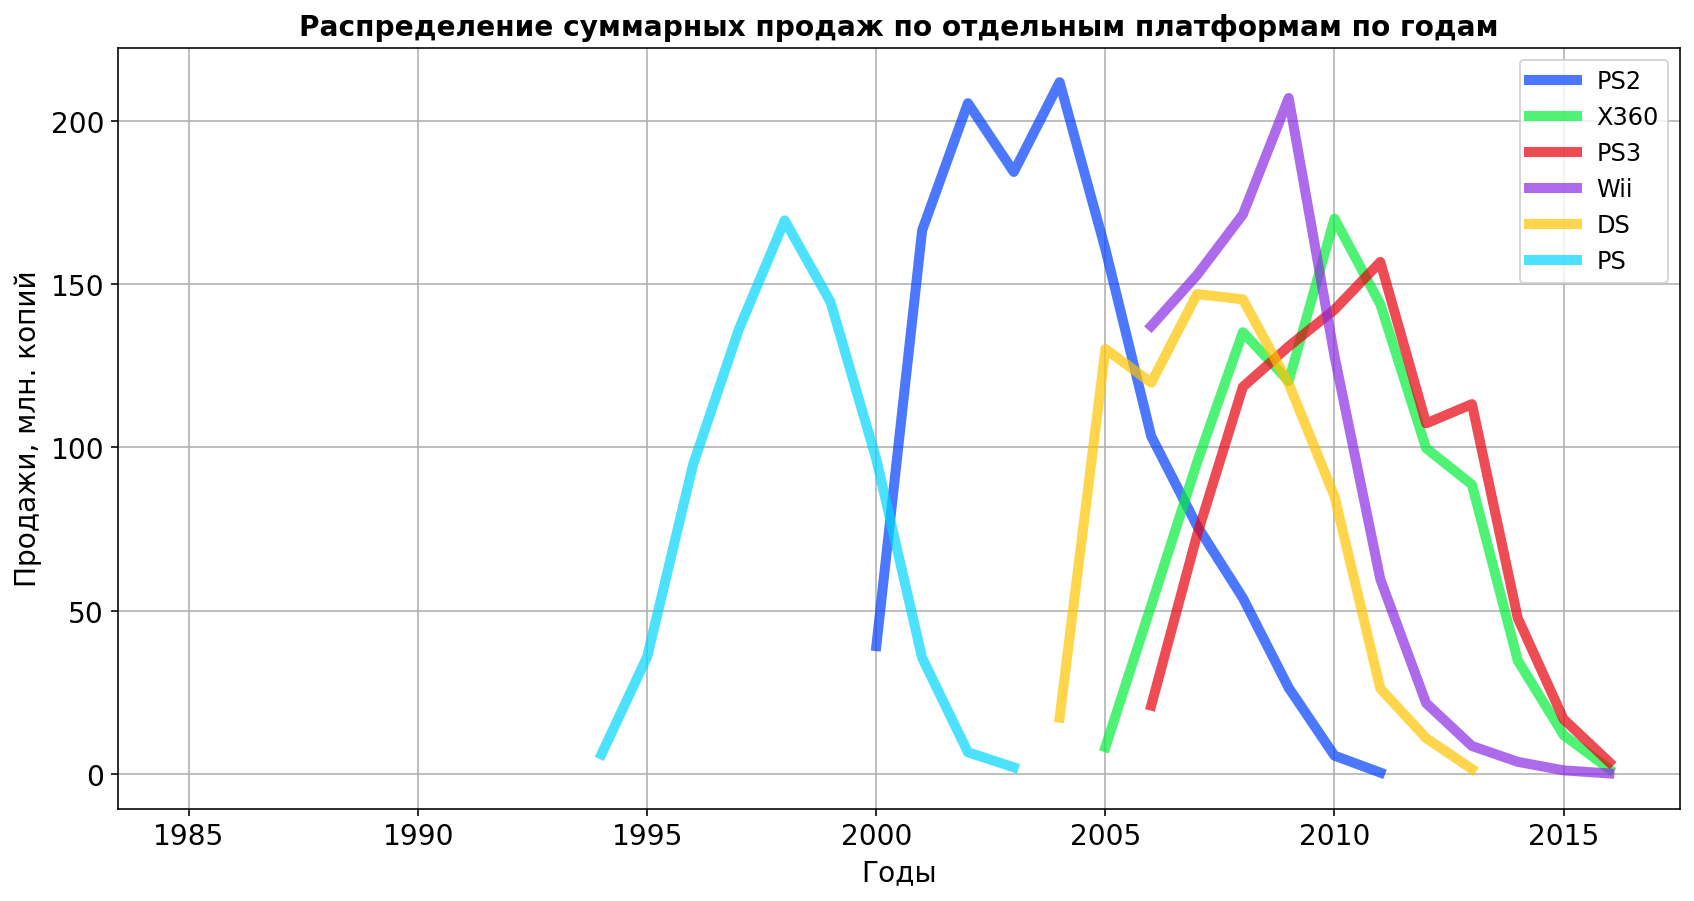

In [ ]:
# построение графика изменения продаж по 6 платформам по годам
# задание настроек графика: размера, названия заголовка, подписи осей

plt.figure(figsize=(14, 7))
plt.title('Распределение суммарных продаж по отдельным платформам по годам')
plt.xlabel('Годы')
plt.ylabel('Продажи, млн. копий')

# построение графиков для каждой платформы с толщиной линии 5 пт, прозрачностью 0.7 и соответствующей подписью
plt.plot(top_sales_platforms['PS2'], linewidth=5, alpha=0.7, label='PS2')
plt.plot(top_sales_platforms['X360'], linewidth=5, alpha=0.7, label='X360')
plt.plot(top_sales_platforms['PS3'], linewidth=5, alpha=0.7, label='PS3')
plt.plot(top_sales_platforms['Wii'], linewidth=5, alpha=0.7, label='Wii')
plt.plot(top_sales_platforms['DS'], linewidth=5, alpha=0.7, label='DS')
plt.plot(top_sales_platforms['PS'], linewidth=5, alpha=0.7, label='PS')

plt.grid(b=True)
plt.legend(fontsize=12)

По графику распределения суммарных продаж по 6 платформам с наибольшими продажами хорошо прослеживается сходный характер изменения количества продаж для отдельных платформ. После появления платформы следует резкий рост продаж в течении 3-6 лет, затем следует чуть более длительный спад в течении 5-7 лет. Таким образом, время жизни платформы от момента релиза до прекращения продаж равно 9-11 годам.
Данные, соответствующие платформе Wii выглядят неполными, отсутствует начальный отрезок с ростом продаж от 0-20 млн копий в год релиза. Наибольшая пиковая продажа соответствует платформе PS2 и равняется 211.8 млн копиям в 2011 году.
Так же по сводной таблице для платформ DS, PS2, PS3 видно, что платформы впервые вышли в продажу в 1985, 1997, 1991, затем 19, 3 и 14 лет соответственно не было продаж и после этого продажи возобновились и достигли пиковых значений. Период с отсутствием данных о продажах может быть обусловлен либо неполным объёмом данных, т.е. продажи были но у нас этих данных нет. Либо действительно не было продаж и после доработок и обновлений они были возобновлены.

### За какой характерный срок появляются новые и исчезают старые платформы?

Для ответа на данный вопрос необходимо выяснить год выхода первой игры на каждой платформе и год, в котором были последние продажи игр на этой платформе. Предварительно отсортируем данные с годом релиза всех игр по возрастанию. Затем сгруппируем данные по платформе методом groupby и для того, чтобы определить год появления первой игры на каждой платформе применим функцию 'first'. Соответственно, последний год, в котором были продажи найдем с помощью функции 'last'. Для удобства восприятия полученной таблицы, отсортируем данные по возрастанию значений в столбце platform_release.

In [ ]:
# сортировка данных в столбце year_of_release методом sort_values() для корректной дальнейшей работы функций first и last
# группировка данных по столбцу platform методом groupby()
# создание столбца platform_release с годом выпуска первой игры на каждой платформе
# создание столбца platform_end с последним годом продаж игр на каждой платформе
# сортировка по возрастанию значений в столбце platform_release
platform_life = df.sort_values(by='year_of_release') \
    .groupby('platform').agg(platform_release = ('year_of_release', 'first'),
                          platform_end = ('year_of_release', 'last')) \
    .sort_values(by='platform_release')

platform_life['platform_lifetime'] = platform_life['platform_end'] - platform_life['platform_release']
platform_life

,platform_release,platform_end,platform_lifetime
platform,,,
2600,1980.0,1989.0,9.0
NES,1983.0,1994.0,11.0
DS,1985.0,2013.0,28.0
PC,1985.0,2016.0,31.0
GB,1988.0,2001.0,13.0
SNES,1990.0,1999.0,9.0
GEN,1990.0,1994.0,4.0
GG,1992.0,1992.0,0.0
SCD,1993.0,1994.0,1.0


In [ ]:
# рассчет среднего срока жизни платформы
platform_life['platform_lifetime'].mean()

7.612903225806452

Из полученной таблицы следует, что иногда появляются сразу 3 новые игровые платформы в год, как в 1994 и 2000 году, иногда 2 как в 1985, 1990, 1993, 1994, 1996. Также иногда между выходами платформ проходит от 1 до 5 лет, как между wii в 2006 до PSV в 2011. В среднем же каждый год выходят новые игровые платформы.
Согласно столбцу platform_end, практически каждый год уходят старые платформы. В 1994 году сразу 4 платформы завершили свои продажи: 2600, NES, GEN, SCD.
Средний срок жизни платформы составляет 8.8 лет.

### Выбор актуального периода для дальнейшего анализа

Для прогноза следующего 2017 года, необходимо определиться с периодом времени, который использовать, т.к. часть исходных данных уже потеряла актуальность. Для начала проверим как менялись продажи игр по всем платформам по годам.
Создадим сводную таблицу с количеством игр, вышедших в каждый год и построем по ней график.

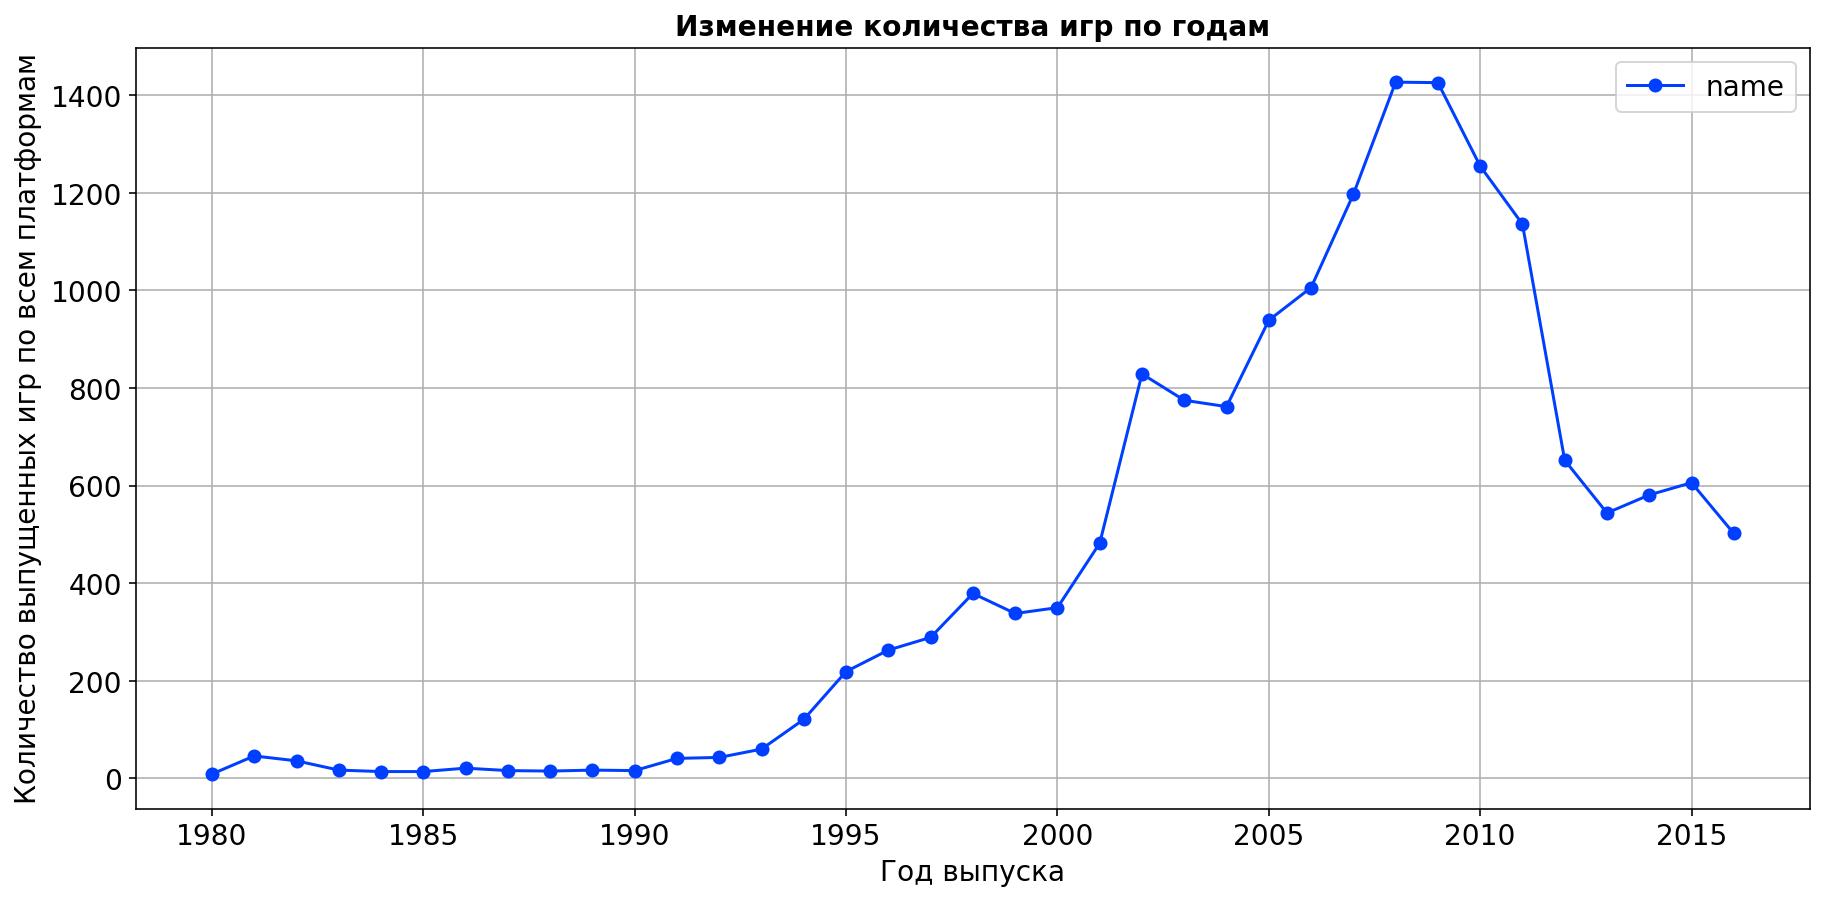

In [ ]:
# сводная таблица
# график
df.pivot_table(index='year_of_release', values='name', aggfunc=['count']) \
    .plot(y='count', ylabel='Количество выпущенных игр по всем платформам', xlabel='Год выпуска',
          style='o-', grid=True, figsize=(15, 7),
          title='Изменение количества игр по годам')
plt.show()

По графику изменения количества выпусков игр в разные годы видно, что в исследуемой выборке имеются данные с 1980 по 2016 год. До 1994 года количество новых игр было меньше 100 в год. Затем с 1994 по 2001 количество выпущенных игр было в диапазоне 122 до 486. В 2002 году количество практически удвоилось и стало равным 845. В 2003 и 2004 незначительно уменьшилось до 783 и 764. С 2005 по 2009 наблюдается устойчивый рост с пиковым значением в 1441. И уже начиная с 2009 график пошел на спад. Количество игр, выпущенных за год, уменьшилось до 548 в 2013 году. Начиная с 2013 и по текущий 2016 год, наблюдается боковой тренд с небольшими колебаниями в диапазоне 502-548.
Для прогноза 2017 года подойдёт срез с данными, начиная с 2012 года, т.к. именно этот период характеризует текущий боковой тренд, кроме того период в 5 лет (2012-2016) охватит почти полный срок жизни платформы (8.8 лет).

In [ ]:
# срез данных необходимый для прогноза продаж на 2017 год
df_cut = df.query('year_of_release >= 2012')

### Какие платформы лидируют по продажам, растут или падают?

Создадим сводную таблицу с общими продажами по каждой платформе по годам и затем визуализируем её в графическом виде.

In [ ]:
# сводная таблица с общими продажами по каждой платформе по годам
df_cut.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,51.36,11.01,23.22,107.35,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


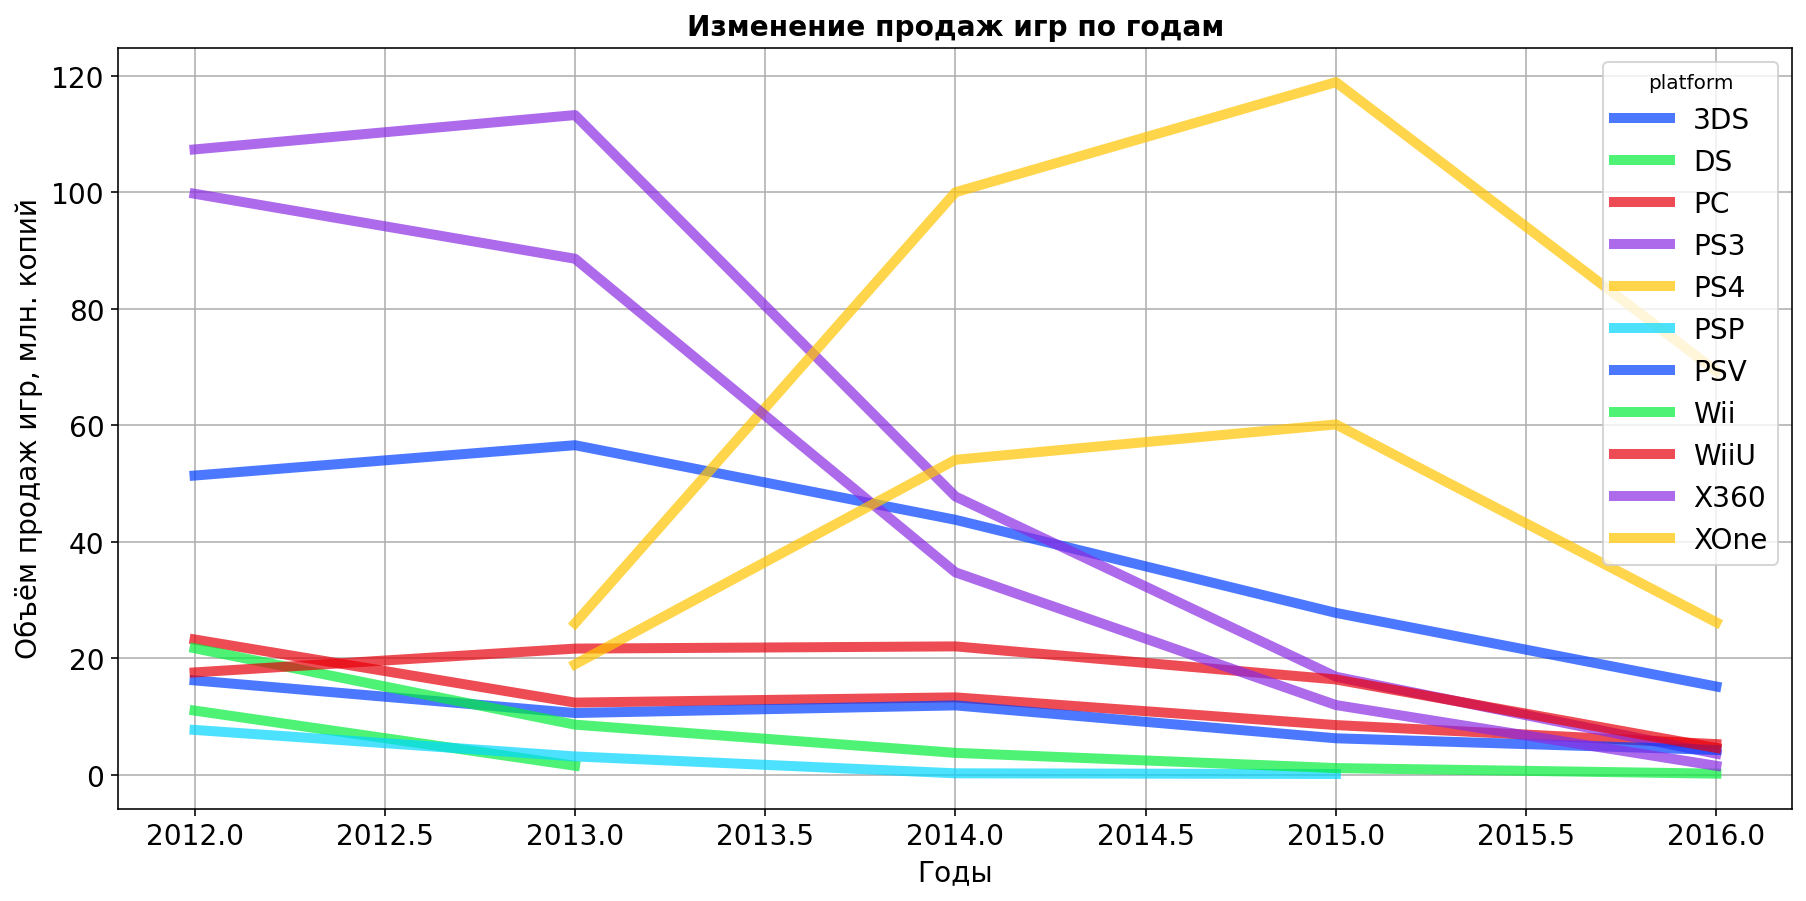

In [ ]:
df_cut.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum') \
    .plot(grid=True, figsize=(15, 7), linewidth=5, alpha=0.7,
            ylabel='Объём продаж игр, млн. копий', xlabel='Годы',
            title='Изменение продаж игр по годам', )
plt.show()

Из полученного графика видно, что продажи по всем играм находятся в падающем тренде и по большинству игр уже близки к нулю. По объёмам продаж уверенно лидирует платформа PS4. Далее по убыванию объёмов продаж идут XOne и 3DS.

Построим "ящик с усами" по суммарным продажам игр в разбивке по платформам.

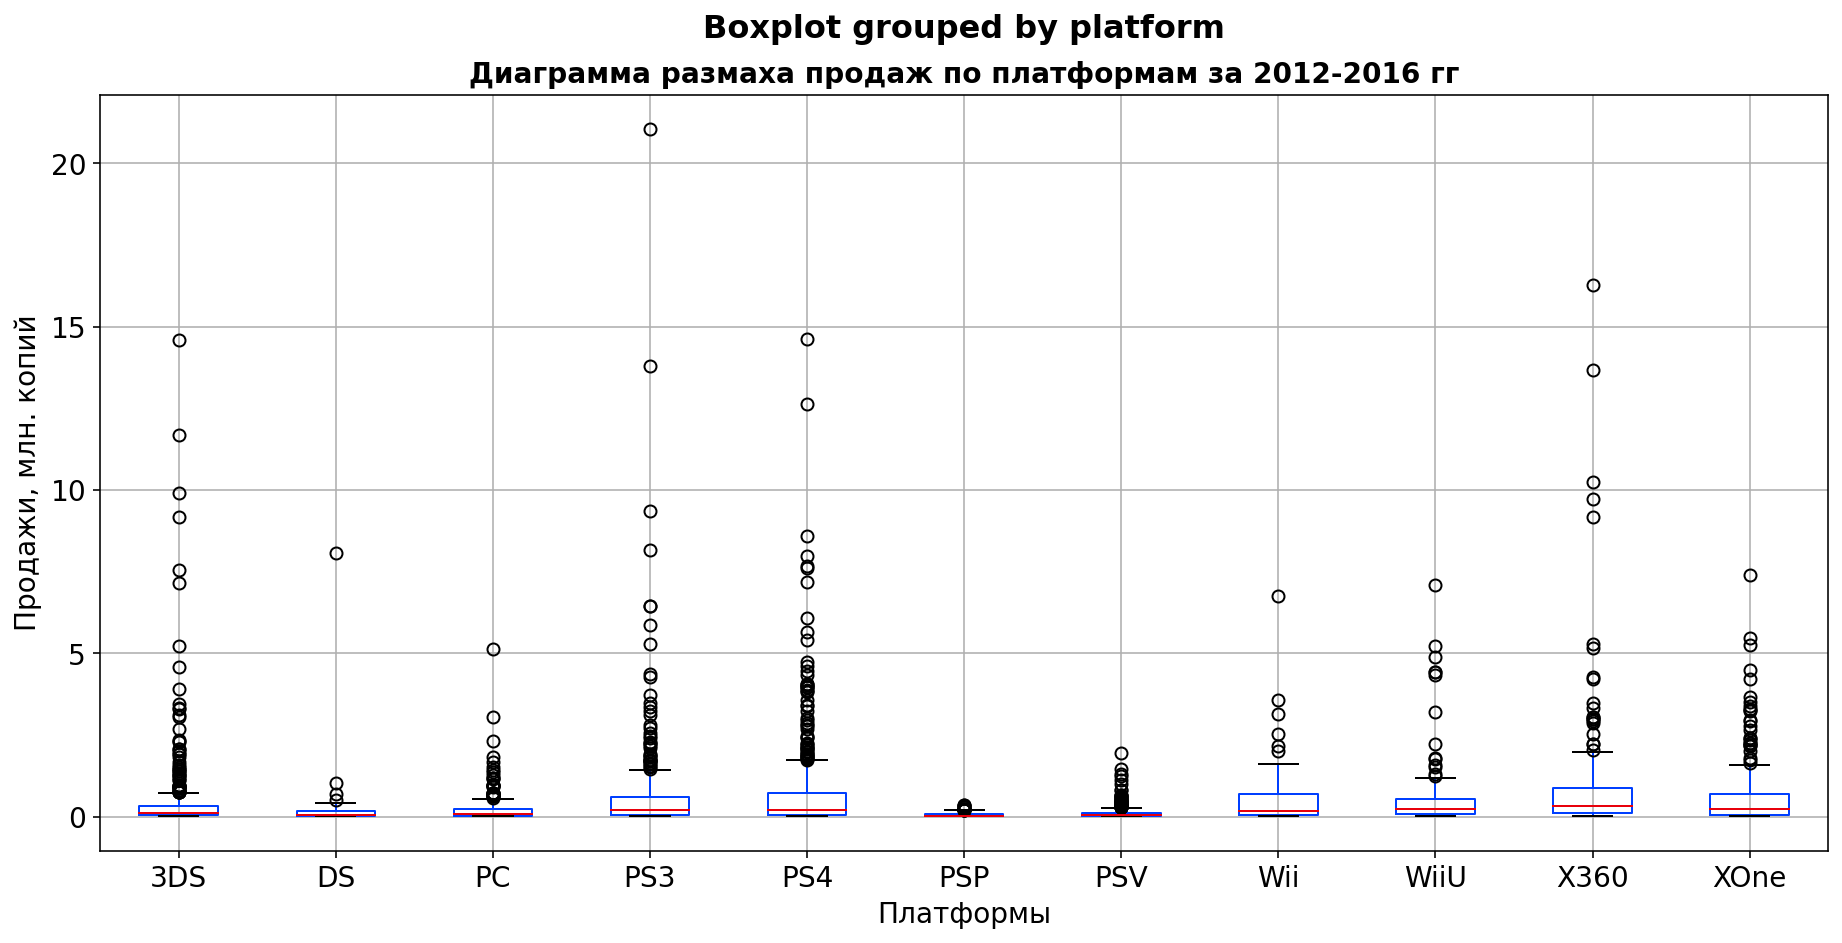

In [ ]:
# построение диаграммы размаха с указанием названия заголовка, подписи осей
df_cut.boxplot(column='total_sales', by='platform', figsize=(15, 7))
plt.title('Диаграмма размаха продаж по платформам за 2012-2016 гг', fontsize=14, fontweight="bold")
plt.xlabel('Платформы', fontsize=14)
plt.ylabel('Продажи, млн. копий', fontsize=14)
plt.show()

По диаграммам размаха видно большое количество выбросов, т.е. значений, которые выбиваются за пределы верхнего "уса". Не будем удалять их, т.к. возможно они отражают продажи отдельных игр-бестселлеров.
Подберём такие параметры ylim, чтобы можно было получше разглядеть распределение квартилей по платформам.

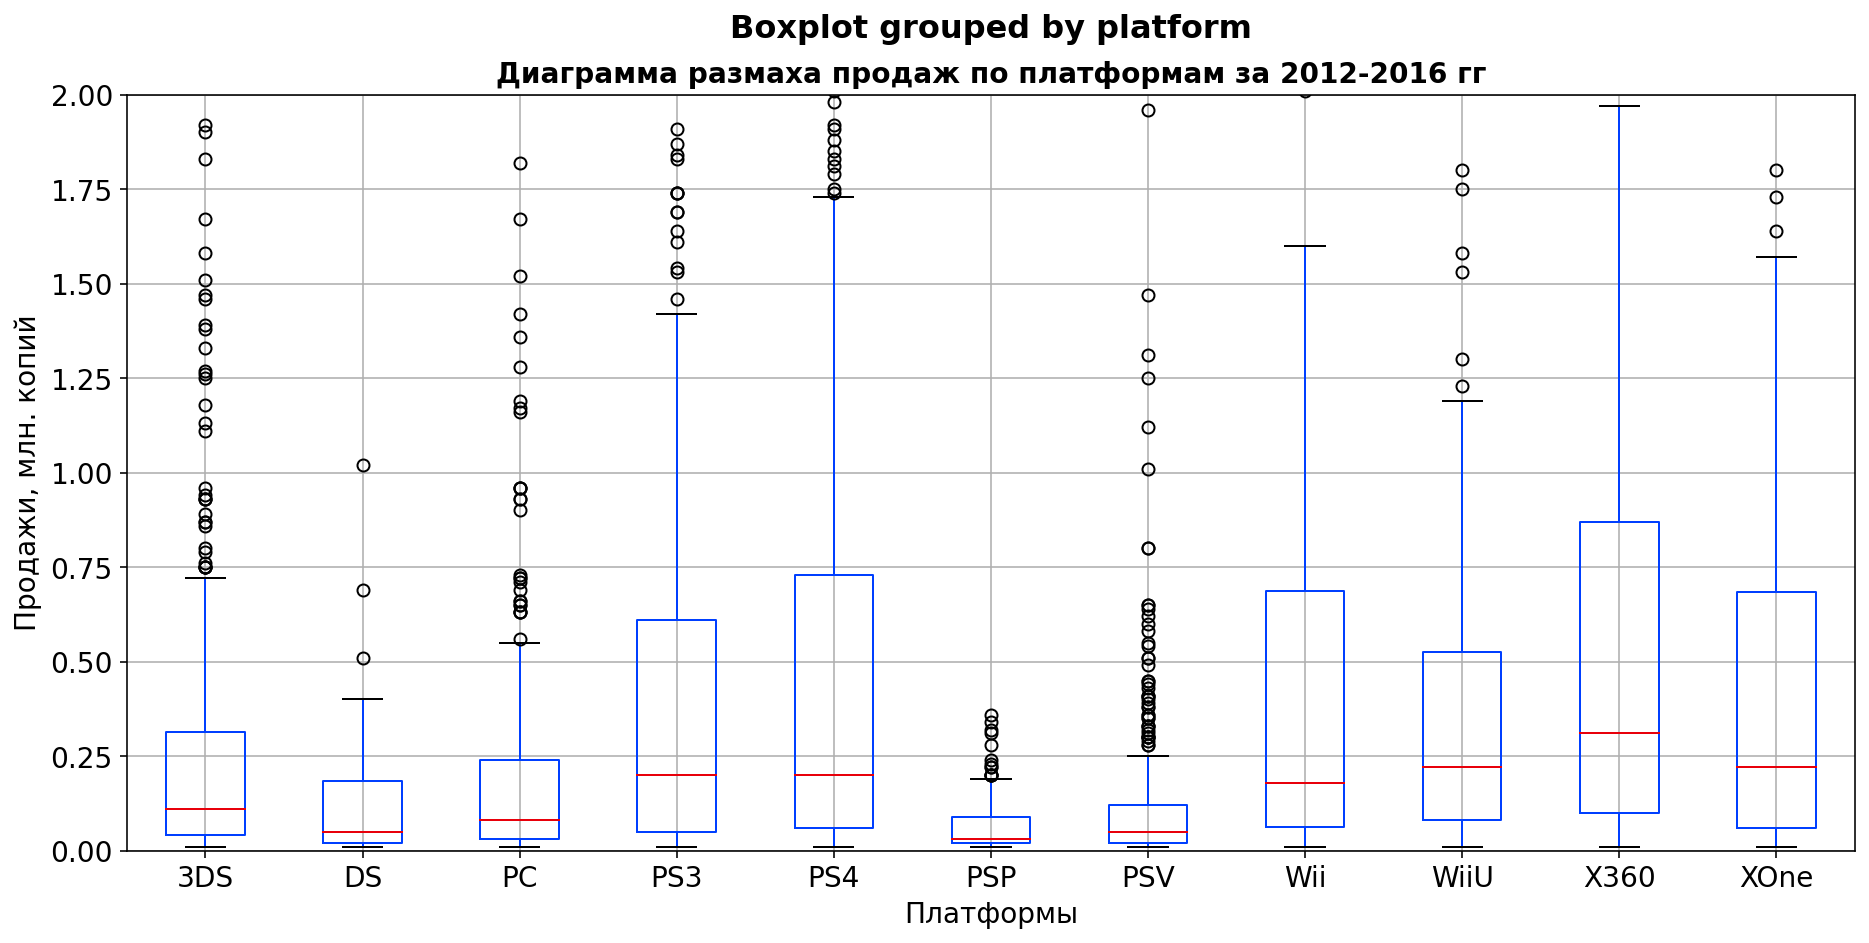

In [ ]:
# построение диаграммы размаха с указанием названия заголовка, подписи осей
df_cut.boxplot(column='total_sales', by='platform', figsize=(15, 7))
plt.title('Диаграмма размаха продаж по платформам за 2012-2016 гг', fontsize=14, fontweight="bold")
plt.xlabel('Платформы', fontsize=14)
plt.ylabel('Продажи, млн. копий', fontsize=14)
plt.ylim(0, 2)
plt.show()

In [ ]:
# просмотр описательной статистики продаж по каждой платформе
df_cut.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,492.0,0.586951,1.464113,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


In [ ]:
# расчет медианы продаж по каждой платформе и ее сортировка по убыванию
df_cut.groupby('platform')['total_sales'] \
    .median() \
    .sort_values(ascending=False)

platform
X360    0.31
WiiU    0.22
XOne    0.22
PS4     0.20
PS3     0.20
Wii     0.18
3DS     0.11
PC      0.08
DS      0.05
PSV     0.05
PSP     0.03
Name: total_sales, dtype: float64

По диаграмме размаха выделяются ряд платформ с длинными верхними "усами" - PS3, PS4, Wii,WiiU, X360 и XOne. По зелёной линии на боксплотах, соответствующей медиане, а также по таблице с описательной статистикой видно, что наибольшая медианная величина продаж у платформы X360 равная 0.31 млн копий. Также для этой платформы отмечается наибольшая дисперсия (стандартное отклонение равно 1.71 млн копий), т.е. игры на этой платформе отмечаются большим разбросом в величине продаж.
Далее по убыванию медианного значения идут WiiU и XOne, их медиана равна 0.22 млн копий и PS3 и PS4 с медианой 0.2 млн копий.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

Для анализа возьмём популярную платформу PS4. Сделаем срез данных с помощью логических выражений в атрибуте loc. Отберем строчки, соответствующие платформе PS4 и выберем столбцы critic_score, user_score и total_sales.

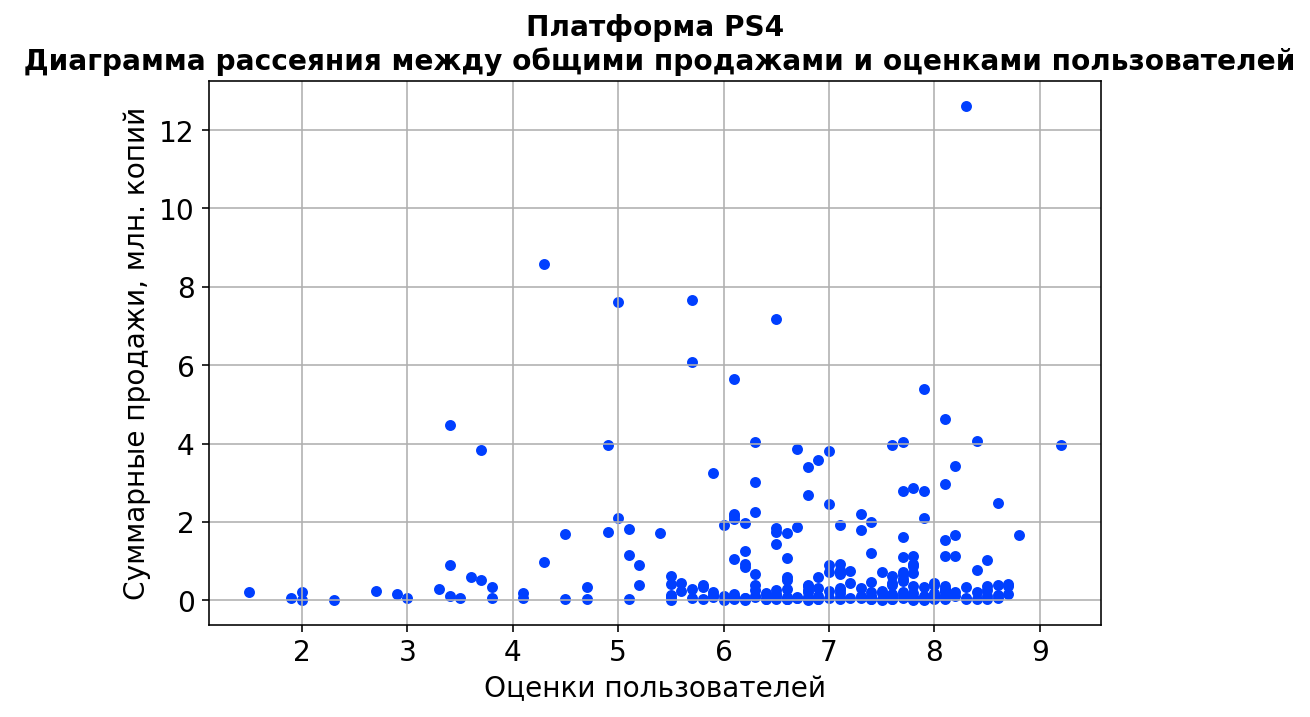

Коэффициент кореляции равен: -0.031957110204556376


In [ ]:
# срез по ненулевым значениям (не равным -999), соответствующим платформе PS4
# построение диаграммы рассеяния
PS4_user_score = df_cut.query('user_score != -999 and platform == "PS4"')
PS4_user_score.plot(x='user_score', y='total_sales', kind='scatter',
          title='Платформа PS4\n Диаграмма рассеяния между общими продажами и оценками пользователей',
         xlabel='Оценки пользователей', ylabel='Суммарные продажи, млн. копий', figsize=(8, 5), grid=True)
plt.show()

print(f"Коэффициент кореляции равен: {PS4_user_score['user_score'].corr(PS4_user_score['total_sales'])}")

- Связь между оценками критиков и оценками пользователей характеризуется коэффициентом корреляции равным 0.55. Это значит, что между ними есть прямая связь, но не слишком сильная. В целом высокооцененные критиками игры также высоко оцениваются и пользователями. И, наоборот, низкооцениваемые игры критиками также низко оцениваются и пользователями. Но так бывает не всегда и иногда мнения критиков и пользователей расходятся.
- По связи между оценками критиков и общим объёмом продаж можно выделить две зоны: узкую полоску до 50 баллов оценки критиков и более широкую после 50. Причём объём продаж для низкорейтинговых игр практически не меняется, т.е. игры с оценкой 20 баллов продаются также плохо как игры с оценкой в 40 баллов. Для более рейтинговых игр связь оценки критиков с объёмом продаж возрастает и прослеживается динамика, что лучше продаются более рейтинговые игры. Коэффициент Пирсона равен 0.33, что свидетельствует о слабой связи.
- По диаграмме разбоса значений оценок пользователей и продаж можно также выделить 2 зоны: более узкую до 3.5 баллов и более широкую выше этого значения. Для низкооценённых игр объемы продаж практически не меняются, т.е. рост оценок пользователей не ведет к росту или уменьшению продаж. На интервале выше 3.5 баллов точки расположены очень хаотично. Игры с оценками около 3.8 продаются с объемами около 4 млн.копий, в то время как некоторые игры с оценками около 9 имеют околонулевые продажи. Коэффициент корреляции равен -0.04, что также свидетельствует о том что связи между этими параметрами практически нет.

Проверим зависимость продаж от оценок критиков и пользователей для других платформ. Используем цикл, перебирающий названия платформ из списка. Затем для каждой платформы из перечня, берутся ненулевые (не равные -999) значения и строится диаграмма рассеяния (kind='scatter'). Кроме того, для каждой платформы рассчитывается коэффициент корреляции.

Коэффициент кореляции для платформы PS3 равен: 0.3341517575509856
Коэффициент кореляции для платформы 3DS равен: 0.3208028695360785
Коэффициент кореляции для платформы WiiU равен: 0.34837976012017485
Коэффициент кореляции для платформы X360 равен: 0.3605734888507336
Коэффициент кореляции для платформы XOne равен: 0.4169983280084017


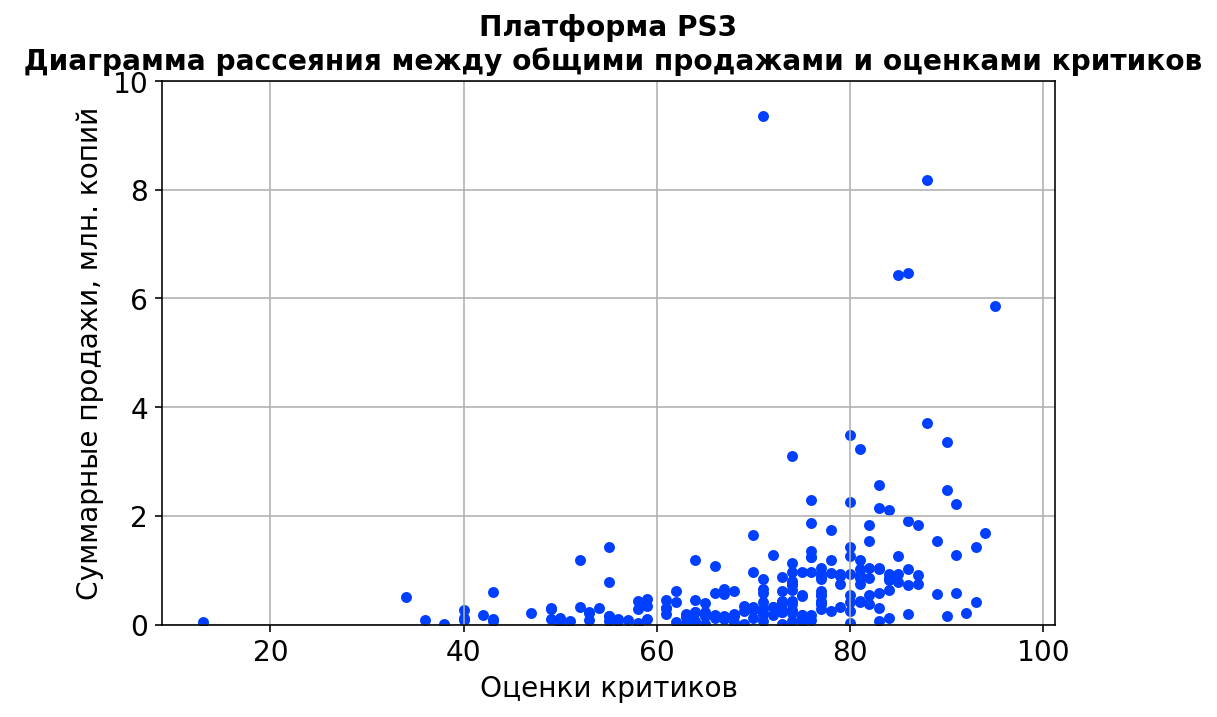

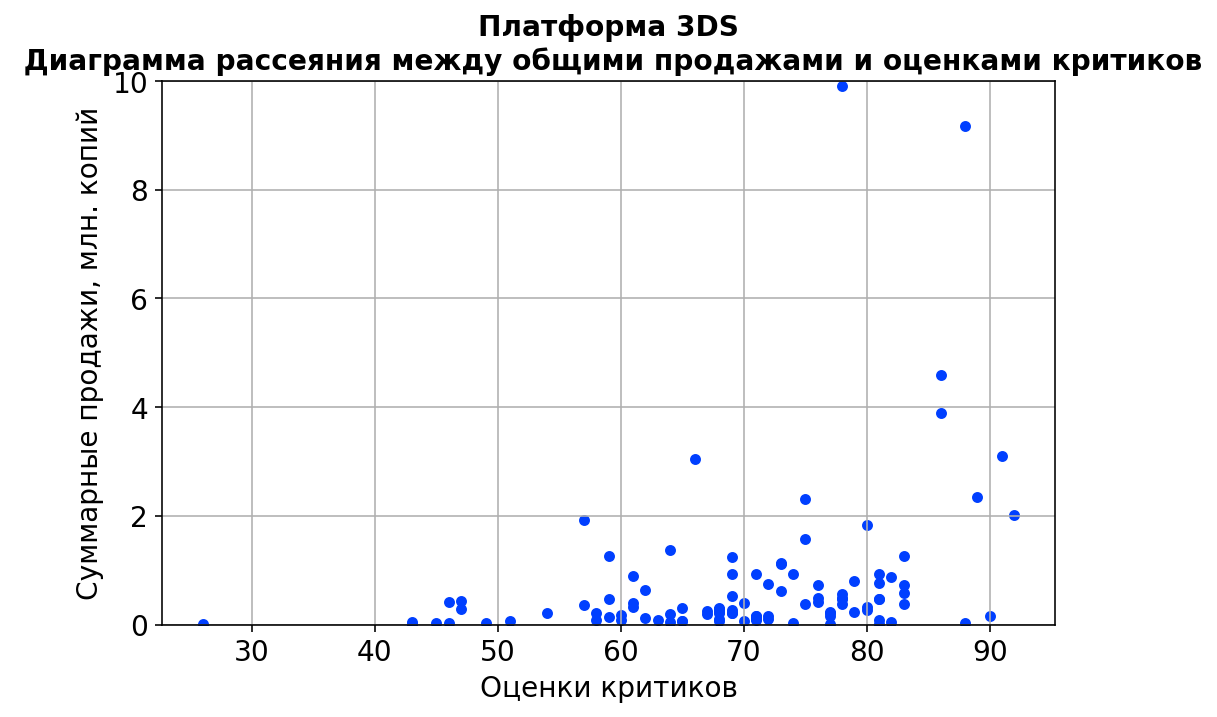

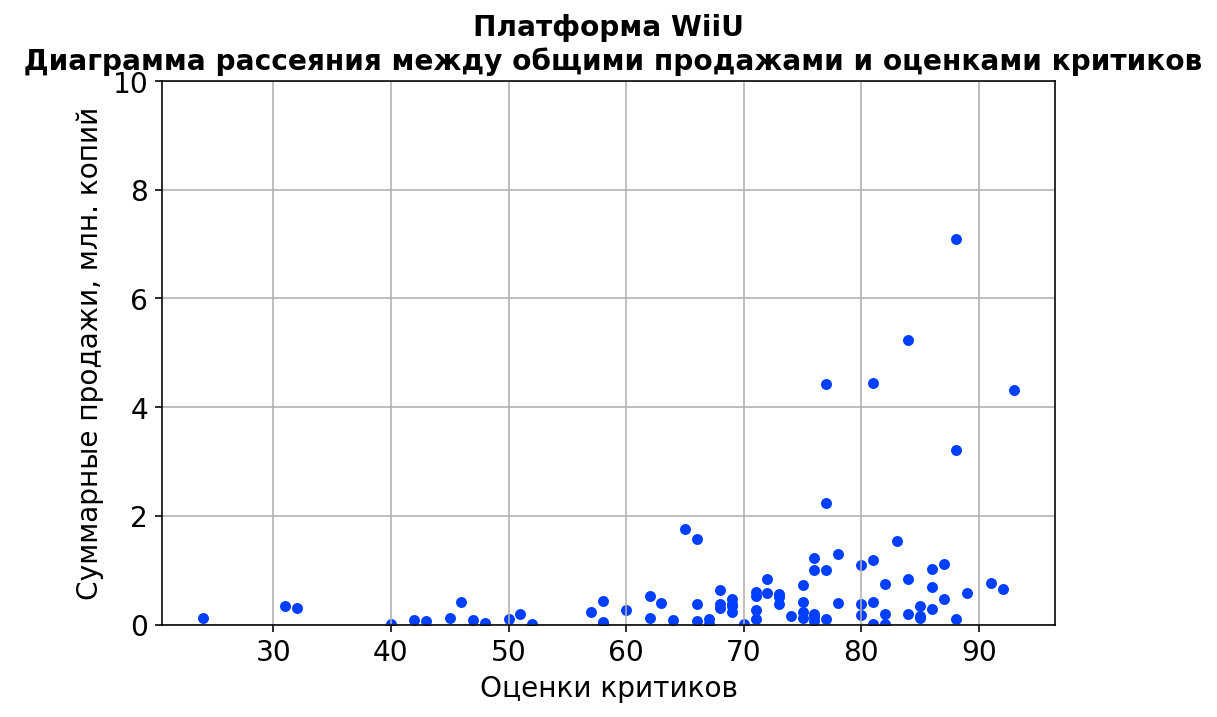

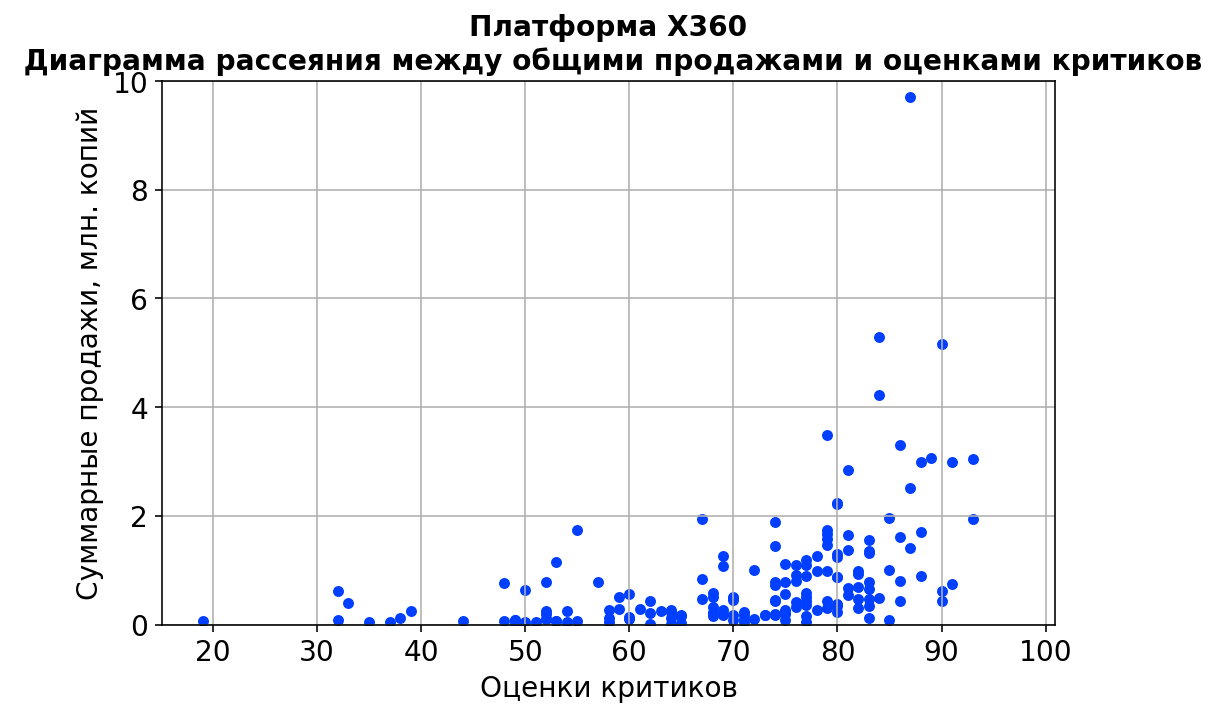

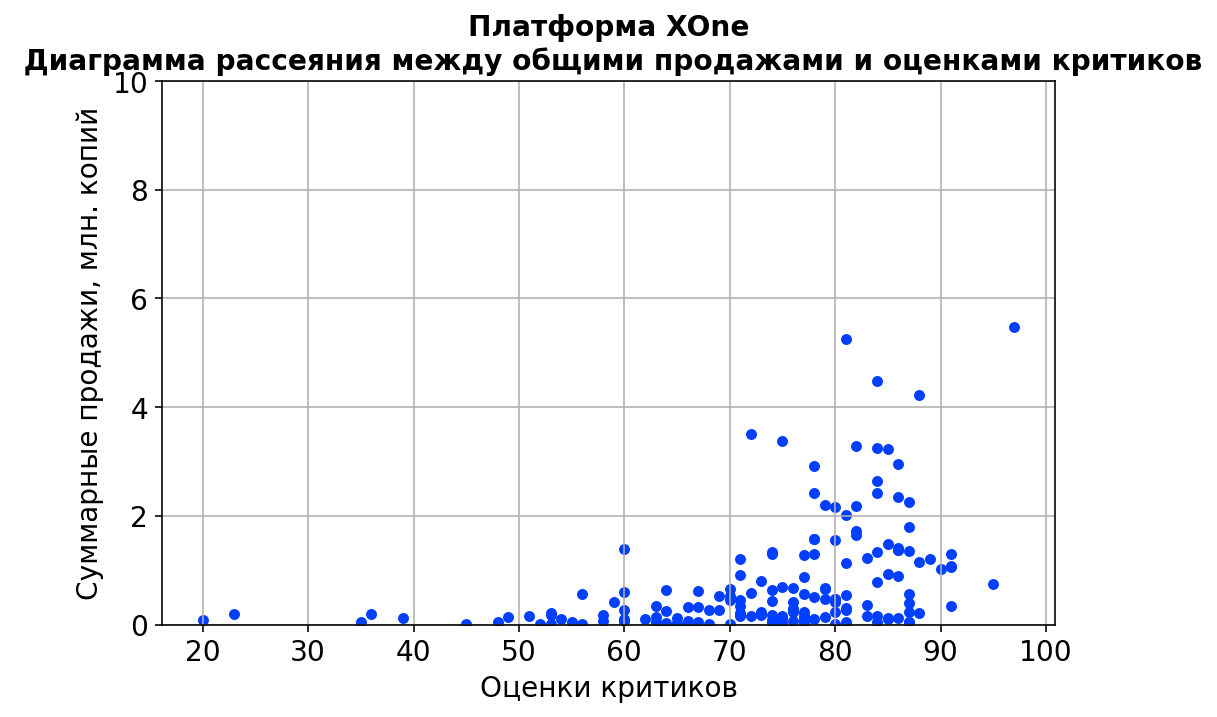

In [ ]:
# цикл перебирающий названия перспективных платформ
# для каждой платформы из перечня и с ненулевыми значениями в critic_score строится диаграмма рассеяния
# и рассчитывается коэффициент корреляции

for p in ['PS3', '3DS', 'WiiU', 'X360', 'XOne']:
    cleaned = df_cut.loc[(df['critic_score'] != -999) & (df['platform'] == p)]
    cleaned.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8, 5), grid=True,
         title=f'Платформа {p}\n Диаграмма рассеяния между общими продажами и оценками критиков',
         xlabel='Оценки критиков', ylabel='Суммарные продажи, млн. копий', ylim=(0, 10))
    print(f"Коэффициент кореляции для платформы {p} равен: {cleaned['critic_score'].corr(cleaned['total_sales'])}")

plt.show()

По диаграммам рассеяния, построенным для других перспективных платформ PS3, 3DS, WiiU, X360, XOne прослеживаются такие же как и для PS4 закономерности. Точки на графиках при невысоких оценках выстраиваются в узкую горизонтальную линию, т.е. при невысоких оценках критиков продажи практически не реагируют на изменение этих оценок. После значения в 50 баллов начинается прослеживаться определённая положительная связь между продажами и оценками критиков, т.е. более высокорейтинговые игры имеют высокие продажи, но такая закономерность прослеживается не для всех игр и некоторые высокорейтинговые игры имеют низкие продажи.
В целом большинство игр на всех платформах имеют рейтинги выше 60.
Коэффициент корреляции для этих платформ находится в диапазоне от 0.32 до 0.42, что тоже свидетельствует о слабой связи.

Коэффициент кореляции для платформы PS3 равен: -0.006205767686051523
Коэффициент кореляции для платформы 3DS равен: 0.19758263411038599
Коэффициент кореляции для платформы WiiU равен: 0.4002190202148617
Коэффициент кореляции для платформы X360 равен: 0.006163978646213326
Коэффициент кореляции для платформы XOne равен: -0.06892505328279414


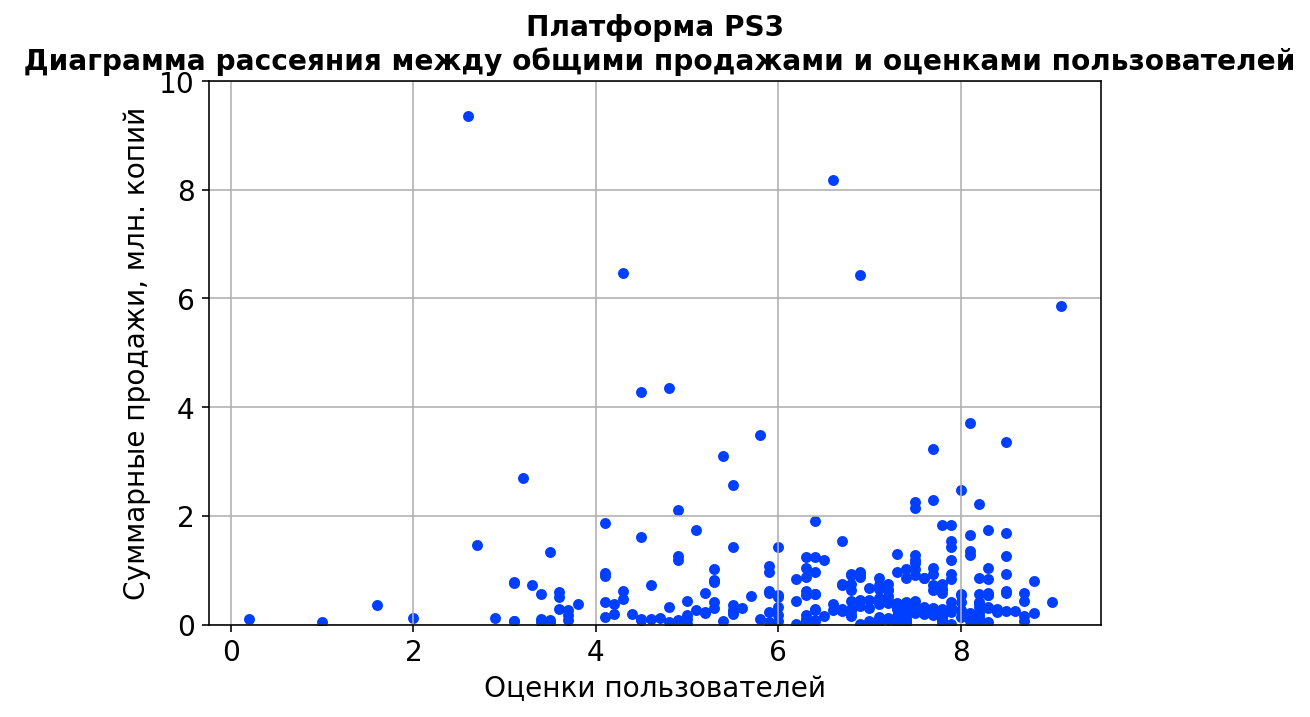

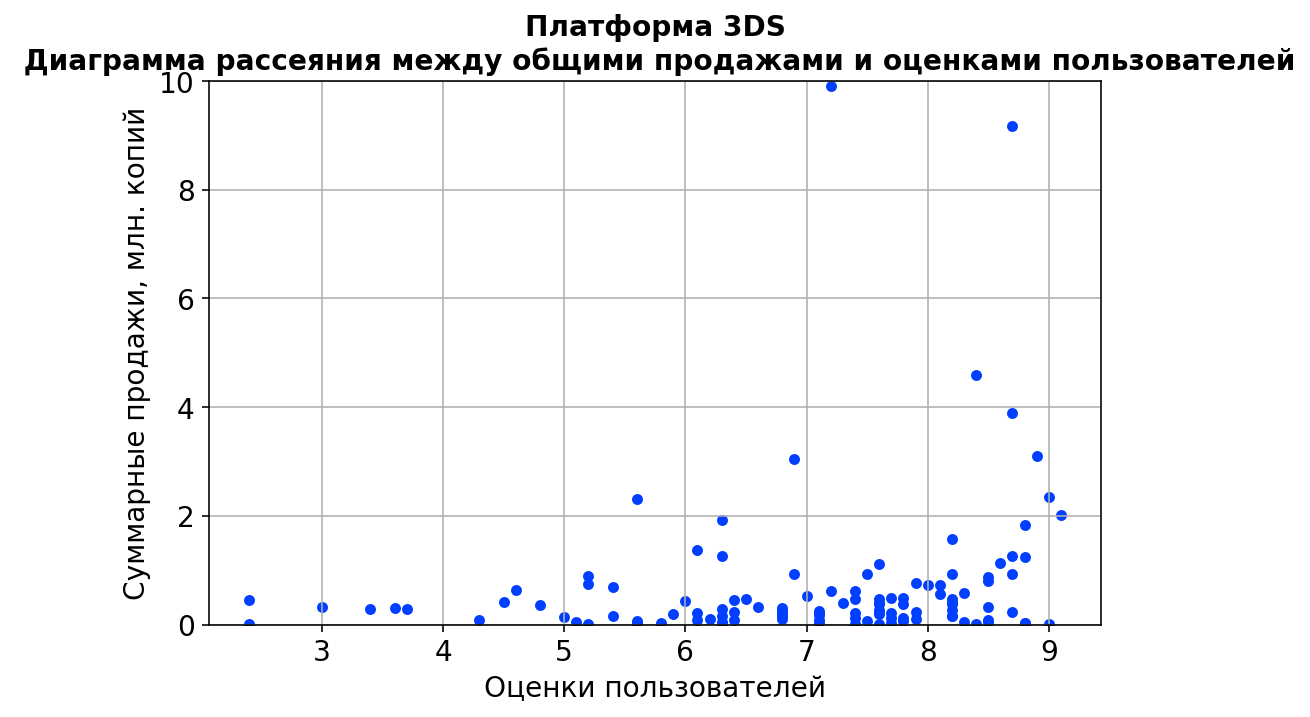

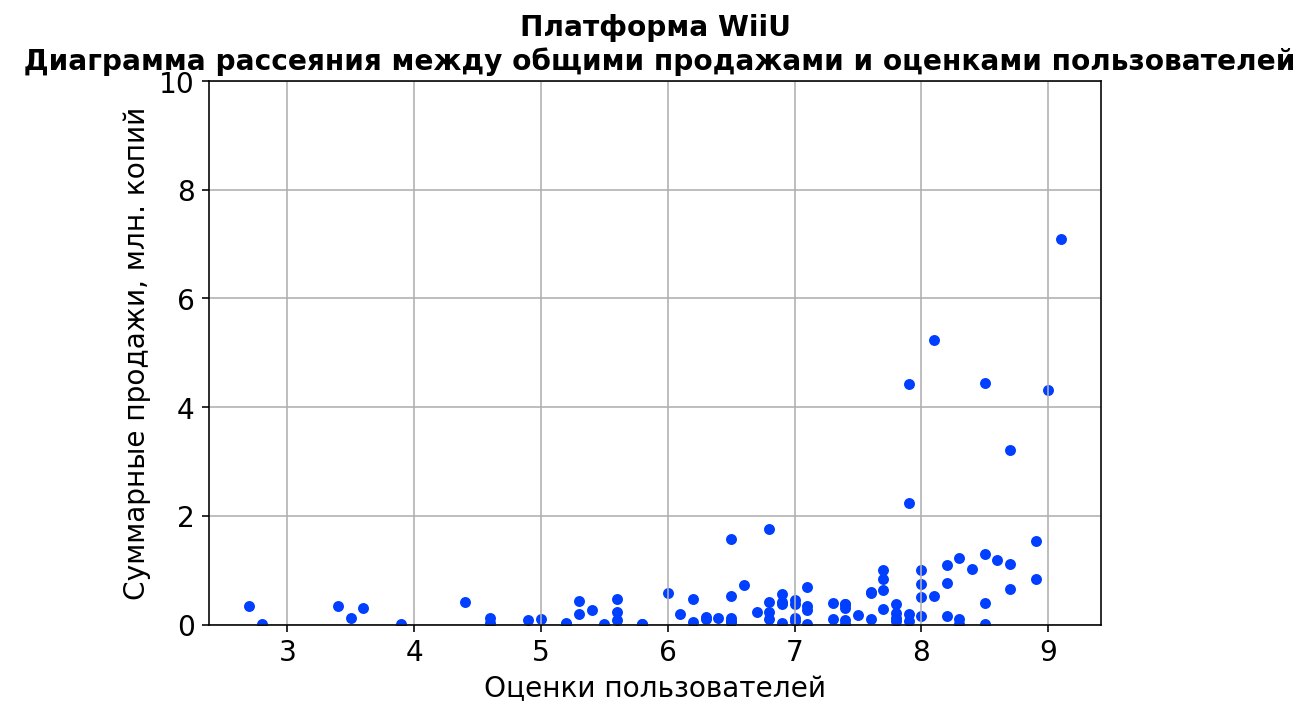

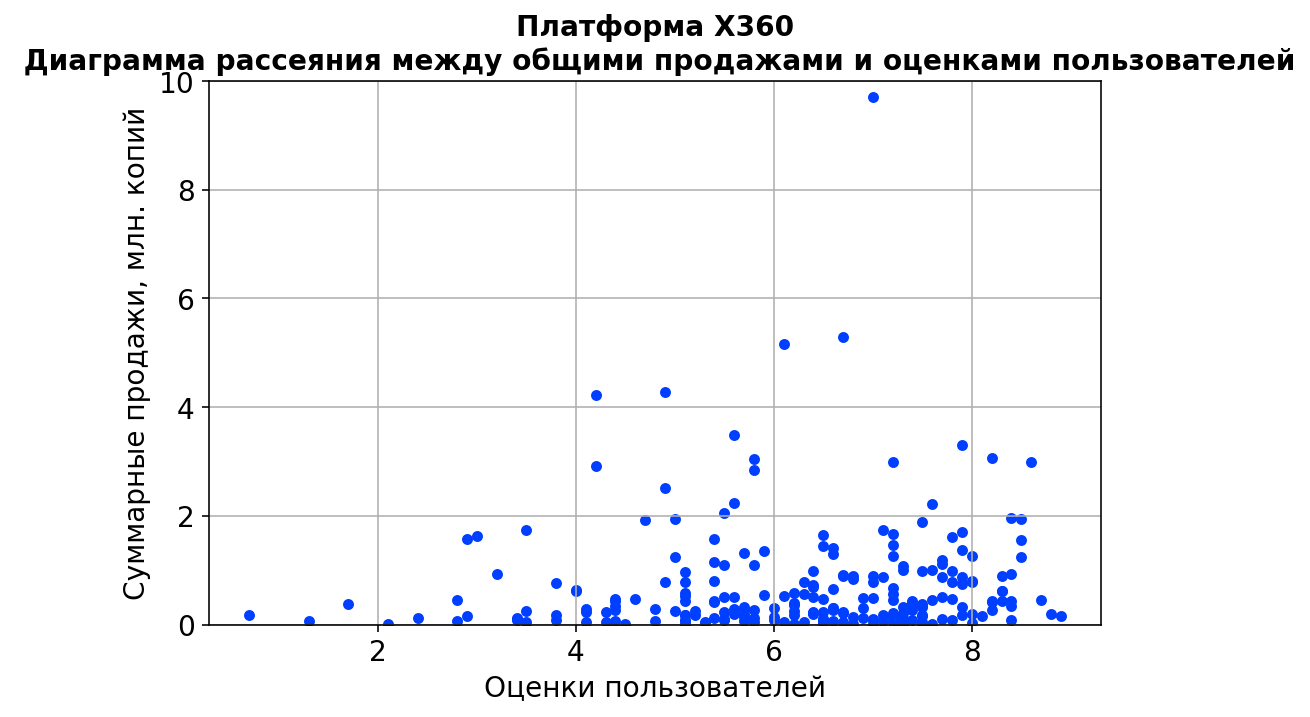

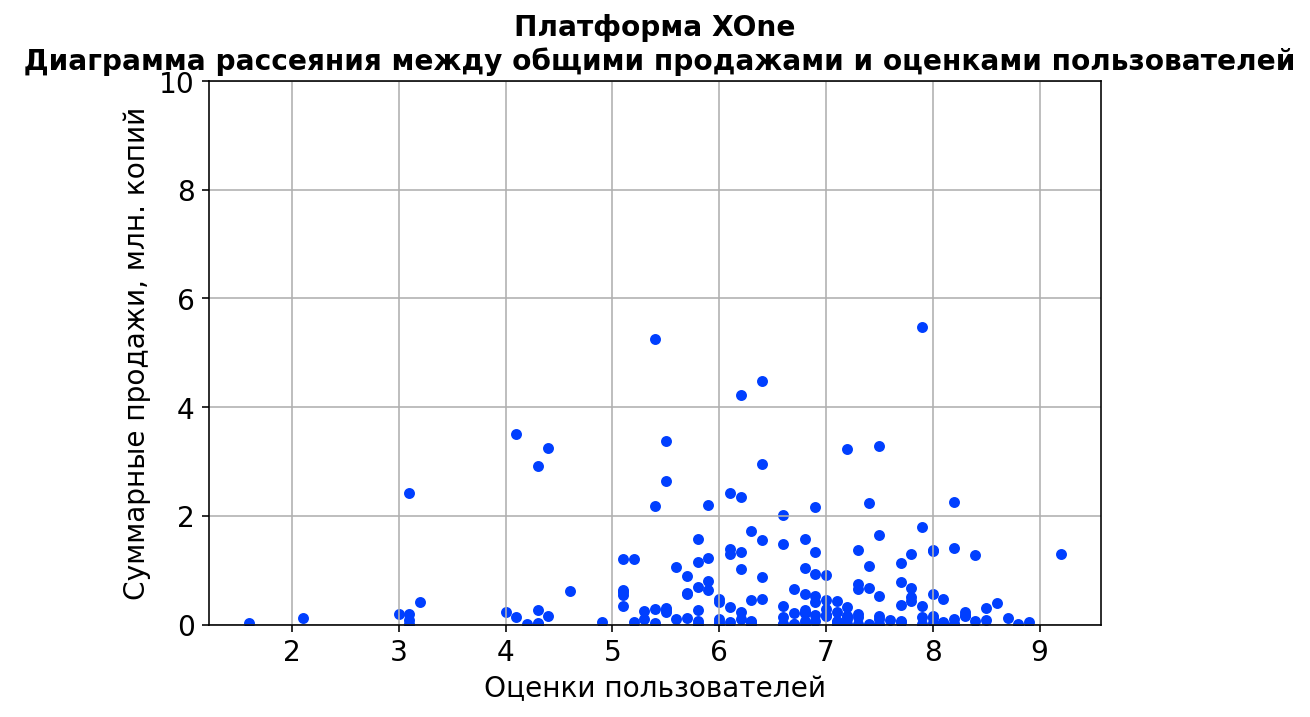

In [ ]:
# цикл перебирающий названия перспективных платформ
# для каждой платформы из перечня и с ненулевыми значениями в user_score строится диаграмма рассеяния
# и рассчитывается коэффициент корреляции
for p in ['PS3', '3DS', 'WiiU', 'X360', 'XOne']:
    cleaned = df_cut.loc[(df['user_score'] != -999) & (df['platform'] == p)]
    cleaned.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8, 5), grid=True,
         title=f'Платформа {p}\n Диаграмма рассеяния между общими продажами и оценками пользователей',
         xlabel='Оценки пользователей', ylabel='Суммарные продажи, млн. копий', ylim=(0, 10))
    print(f"Коэффициент кореляции для платформы {p} равен: {cleaned['user_score'].corr(cleaned['total_sales'])}")

plt.show()

Характер взаимосвязи между оценками пользователей и продажами различается от платформы к платформе. Это так же заметно по коэффициенту корреляции. Для платформ PS3 и XOne он слабо отрицательный -0.006 и -0.07, присутствуют отдельные низкорейтинговые игры с оценками меньше 5, у которых продажи выше 4 млн копий. В то время как большинство высокорейтинговых игр имеют продажи меньше 2 млн копий.
У платформ 3DS, WiiU и X360 уже нет таких низкорейтинговых бестселлеров и по графикам прослеживается определенная прямая зависимость. Коэффициенты корреляции для них равны 0.198, 0.4 и 0.006 соответственно.
В целом можно сделать вывод, что по оценкам критиков и пользователей нельзя однозначно предсказать продажи, т.к. на них влияют еще другие факторы.

### Анализ распределения игр по жанрам. Выявление самых прибыльных жанров

Посмотрим каково распределение игр по жанрам. Для наглядности построим круговую диаграмму, где 100% соответствует общему количеству игр, а долями будут показаны доли игр различных жанров. Для этого применим метод value_counts(), который посчитает количество всех уникальных значений, т.к. в результате получится новый объект Series, преобразуем его в датафрейм методом to_frame(). А затем построим круговую диаграмму методом plot(), указав её тип в параметре kind='pie'.

<AxesSubplot:title={'center':'Распределение игр по жанру'}>

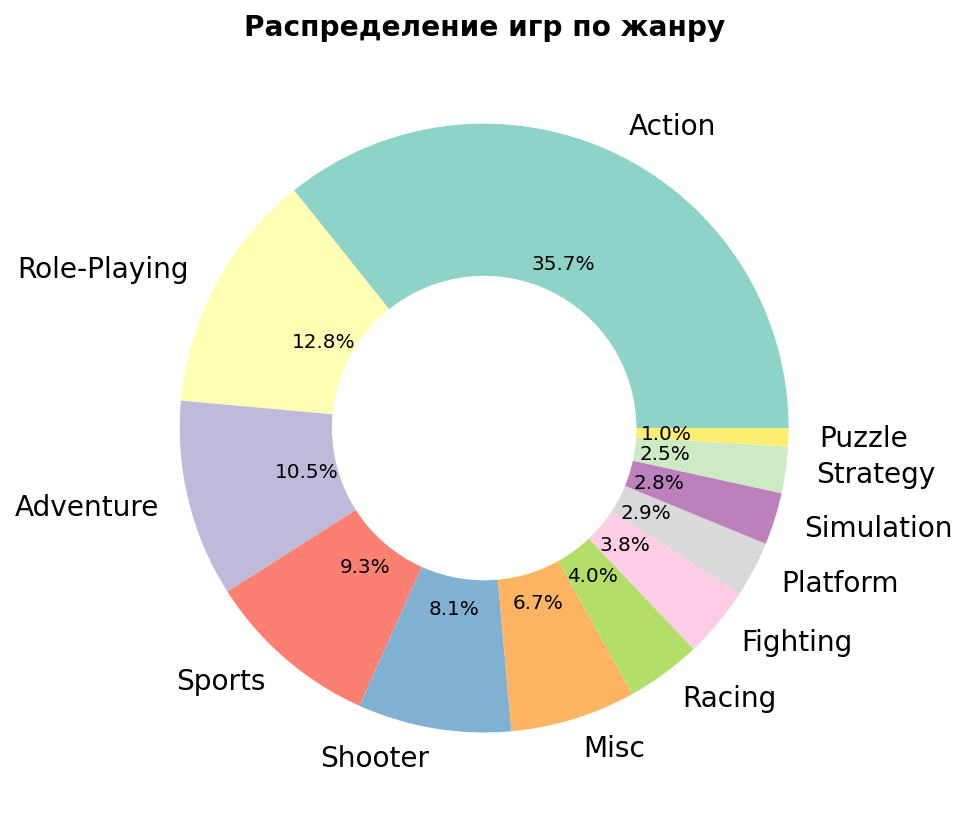

In [ ]:
# подсчёт количества уникальных значений в столбце genre методом value_counts()
# преобразование полученного Series в датафрейм методом to_frame()
# создание круговой диаграммы методом plot()
df_cut['genre'] \
    .value_counts() \
    .to_frame() \
    .plot(y='genre', kind='pie', title='Распределение игр по жанру', autopct='%1.1f%%',
          cmap='Set3', wedgeprops=dict(width=0.5),
          figsize=(7, 7), legend=False, ylabel='')

Наибольшая доля игр выпущена в жанре Action - 35.9%. Далее по убыванию идут Role-Playing (12.8%), Adventure (10.4%) и другие.
Посмотрим как распределяются продажи игр по жанрам.

Посмотрим на диаграммы размаха для всех жанров, чтобы сравнить как распределяются продажи в зависимости от жанра игры.

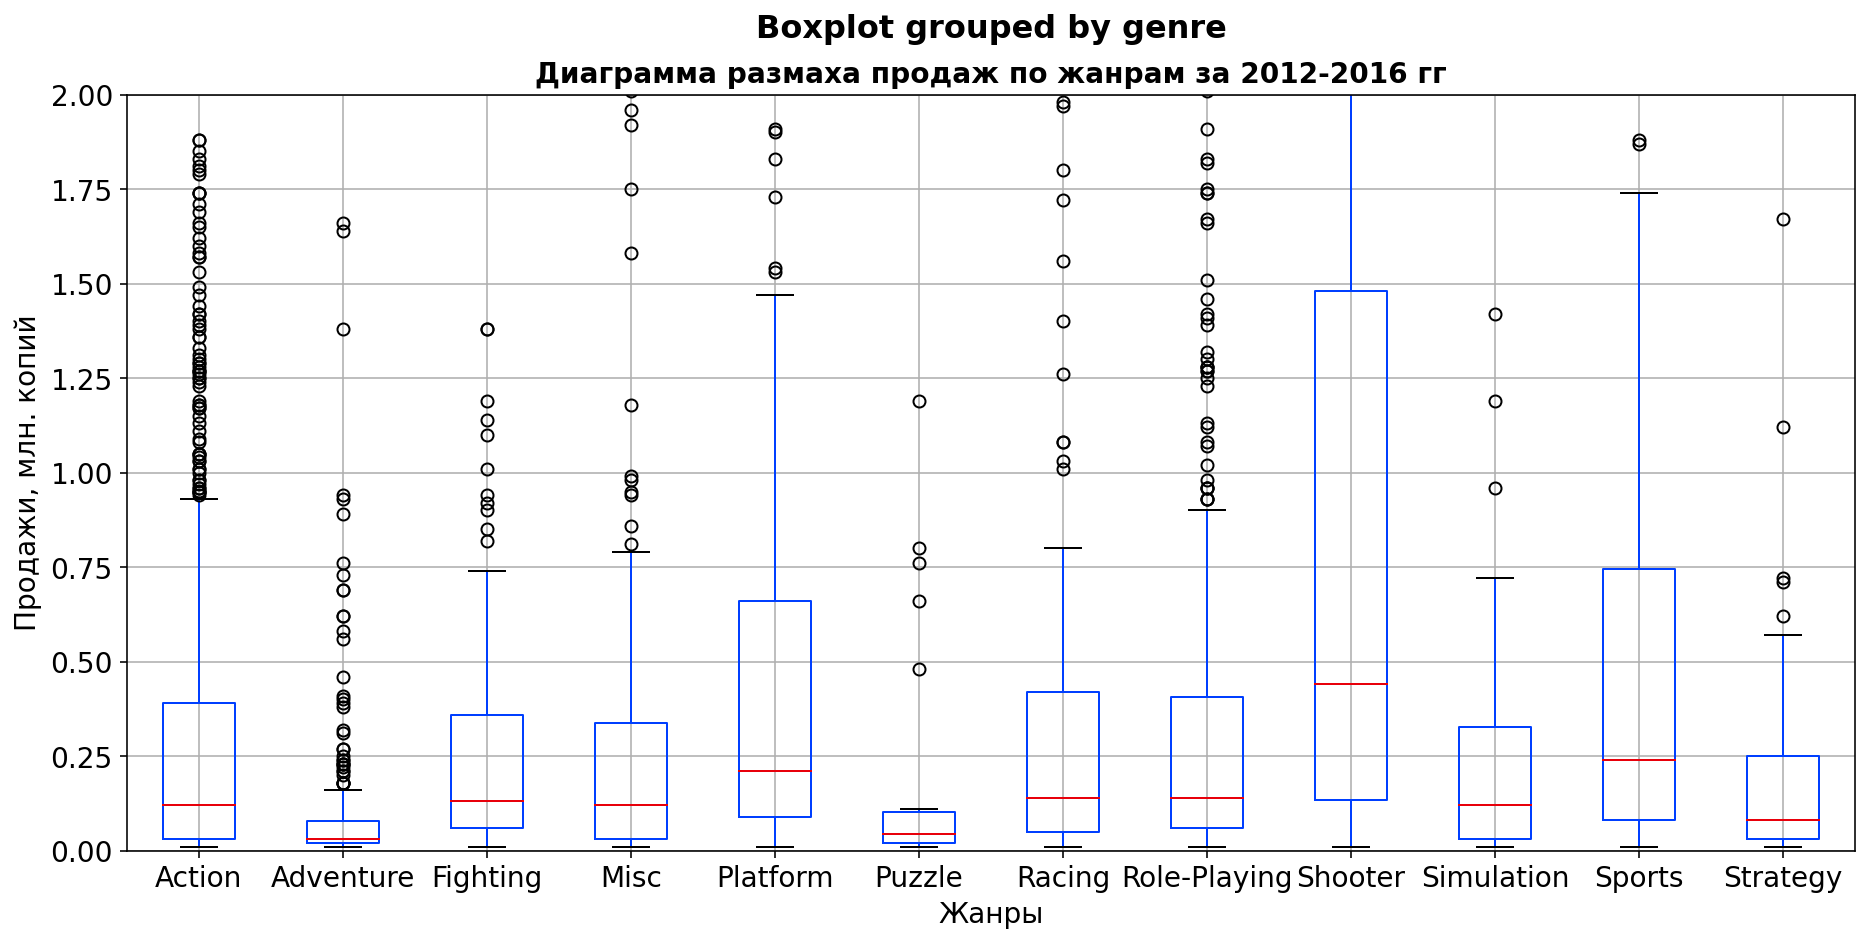

In [ ]:
# построение диаграммы размаха с указанием названия заголовка, подписи осей
df_cut.boxplot(column='total_sales', by='genre', figsize=(15, 7))
plt.title('Диаграмма размаха продаж по жанрам за 2012-2016 гг', fontsize=14, fontweight="bold")
plt.xlabel('Жанры', fontsize=14)
plt.ylabel('Продажи, млн. копий', fontsize=14)
plt.ylim(0, 2)
plt.show()

In [ ]:
# просмотр описательной статистики продаж по каждой платформе
df_cut.groupby('genre')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,1031.0,0.427856,1.166504,0.01,0.030,0.120,0.3900,21.05
Adventure,302.0,0.097450,0.208237,0.01,0.020,0.030,0.0775,1.66
Fighting,109.0,0.408165,0.910385,0.01,0.060,0.130,0.3600,7.55
Misc,192.0,0.442917,1.081047,0.01,0.030,0.120,0.3375,9.18
Platform,85.0,0.717647,1.364413,0.01,0.090,0.210,0.6600,9.90
Puzzle,28.0,0.174643,0.305438,0.01,0.020,0.045,0.1025,1.19
Racing,115.0,0.465217,0.888664,0.01,0.050,0.140,0.4200,7.09
Role-Playing,370.0,0.521081,1.315937,0.01,0.060,0.140,0.4075,14.60
Shooter,235.0,1.296723,2.251662,0.01,0.135,0.440,1.4800,14.63


In [ ]:
# расчет медианы продаж по каждому жанру и ее сортировка по убыванию
df_cut.groupby('genre')['total_sales'] \
    .median() \
    .sort_values(ascending=False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

По диаграммам размаха видно, что для жанров Action, Adventure и Role-Playing есть большое количество значений, выходящих за пределы верхнего "уса". Эти значения даже практически сливаются в одну линию. Это означает, что присутствует ряд игр, выбивающихся из общего набора игр этого жанра, своими большими объемами продаж. Однако, медианное значение продаж этих жанров невелико по сравнению с медианами продаж игр других жанров. Т.е. если делать ставку на какую-то одну игру одного жанра, то с большей долей вероятности стоит ожидать, что игра жанра Shooter будет иметь более высокие продажи, нежели игра жанра Action.
Исходя из медианных значений, **наиболее прибыльными являются игры жанра Shooter (0.44 млн.копий), Sports (0.21 млн копий), Platform (0.21 млн копий), Role-Playing и Racing (0.14 млн копий).**

## Портрет пользователя каждого региона

Посмотрим на объем рынка в Северной Америке, Европе и Японии. Для этого просуммируем соответствующие столбцы с продажами.

In [ ]:
# оценка объема рынка в Северной Америке, Европе и Японии
print(f"Объем рынка в Северной Америке: {df_cut['na_sales'].sum()} млн копий")
print(f"Объем рынка в Европе: {df_cut['eu_sales'].sum()} млн копий")
print(f"Объем рынка в Японии: {df_cut['jp_sales'].sum()} млн копий")

Объем рынка в Северной Америке: 590.97 млн копий
Объем рынка в Европе: 506.81000000000006 млн копий
Объем рынка в Японии: 192.58 млн копий


В Северной Америке было продано больше всего игр - 590.97 млн копий, чуть меньше в Европе (506.81 млн копий) и в 3 раза меньше в Японии (192.58 млн копий). Вероятнее всего это связано с большой разницей в численности населения этих регионов.

### Топ-5 платформ по продажам в Северной Америке, Европе и Японии

Посмотрим как различаются продажи по платформам в различных регионах - в Северной Америке, Европе и Японии.

In [ ]:
def build_pie(cat_feature, num_feature, title):
    # построение сводной таблицы методом pivot_table() с группировкой по столбцу platform
    # и заданием функции sum для значений na_sales
    # построение круговой диаграммы, указав тип 'pie'
    df_cut.pivot_table(index=cat_feature, values=num_feature, aggfunc='sum') \
        .sort_values(by=num_feature) \
        .plot(y=num_feature, kind='pie',
              title='Распределение продаж '+title,
              autopct='%1.1f%%', figsize=(7, 7),
              cmap='Set3', wedgeprops=dict(width=0.5),
              legend=False, ylabel='')
    plt.show()

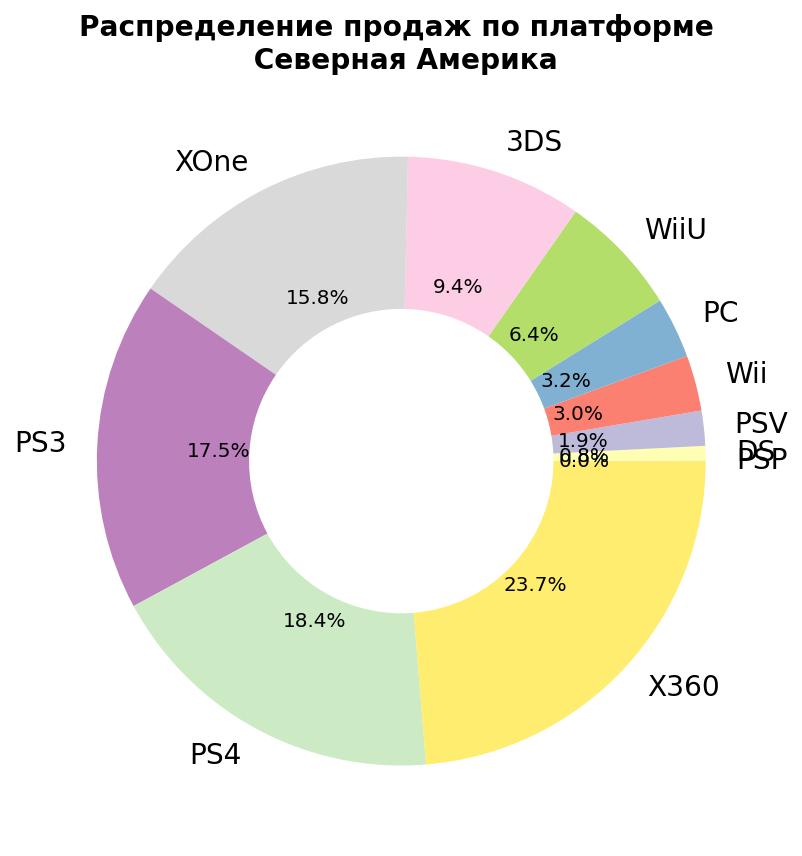

In [ ]:
# построение круговой диаграммы для Северной Америки
build_pie('platform', 'na_sales', 'по платформе \n Северная Америка')

Топ-5 продаж по платформам в Северной Америке выглядит так:
1. X360 - 23.7%
2. PS4 - 18.3%
3. PS3 - 17.5%
4. XOne - 15.7%
5. 3DS - 9.4%.

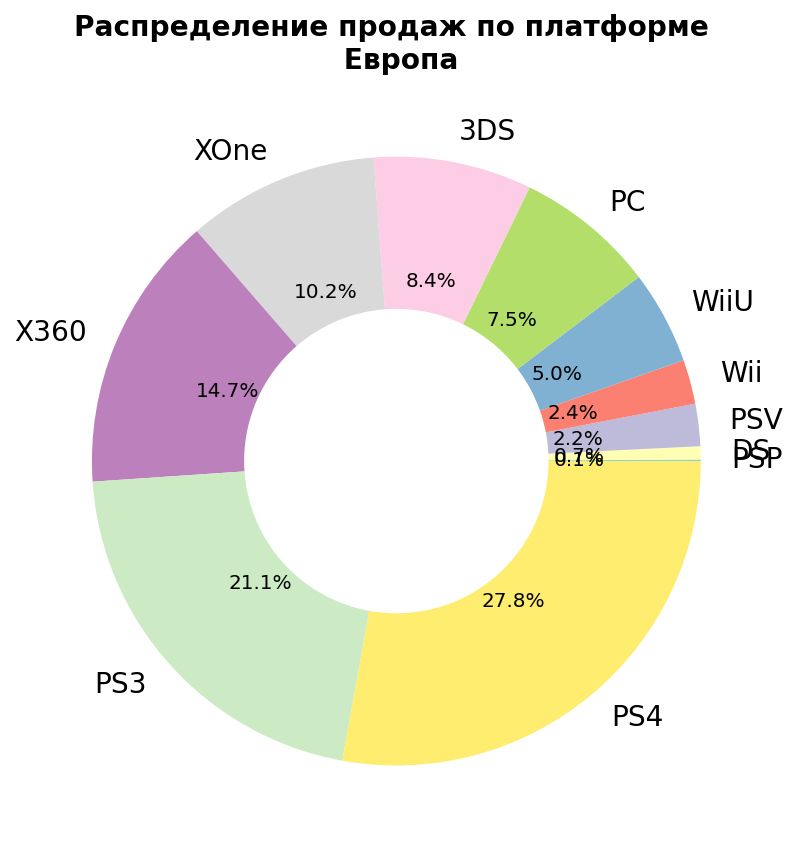

In [ ]:
# построение круговой диаграммы для Европы
build_pie('platform', 'eu_sales', 'по платформе \n Европа')

Топ-5 продаж по платформам в Европе выглядит так:
1. PS4 - 27.7%
2. PS3 - 21.1%
3. X360 - 14.7%
4. XOne - 10.1%
5. 3DS - 8.4%.

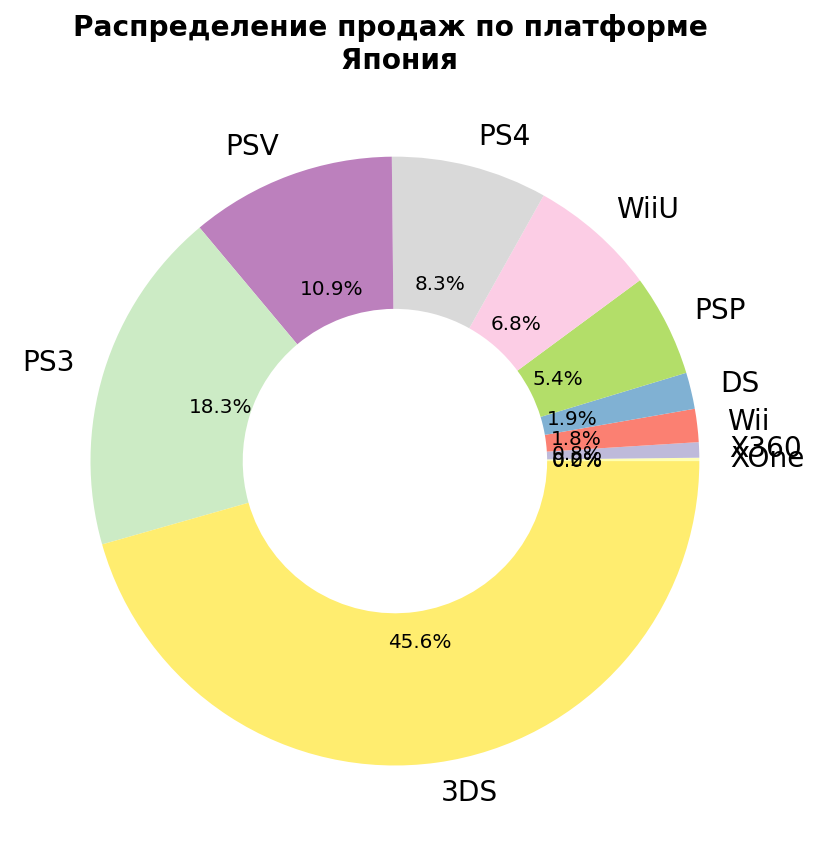

In [ ]:
# построение круговой диаграммы для Японии
build_pie('platform', 'jp_sales', 'по платформе \n Япония')

Топ-5 продаж по платформам в Японии выглядит так:
1. 3DS - 45.5%
2. PS3 - 18.3%
3. PSV - 10.9%
4. PS4 - 8.3%
5. WiiU - 6.7%.

Анализ предпочтений пользователей в разных регионах показал, что вкусы пользователей в Северной Америке и Европе похожи. В топ-5 платформ по продажам в СА и Е попали одни и те же платформы, но их соотношение немного отличается. В СА 1е место заняла платформа X360 с долей продаж 23.7%. В Европе же эта платформа на 3м месте с долей продаж на 9% меньше. В Европе на 1м месте платформа PS4 с долей продаж 27.7%. В СА она на 2м месте с долей продаж на 9.4% меньше. И в СА, и в Европе на 4 и 5 месте XOne и 3DS.
В Японии предпочтения пользователей сильно отличаются. Почти половину общего объема продаж составляет платформа 3DS (45.5%). Доля продаж по платформе PS3 (18.3%) близка к продажам в СА (17.5%) и Европе (21.1%). Продаж по платформе PS4 8.3%, это на 10% меньше, чем в СА и на 19.4% меньше, чем в Европе.

Рассчитаем суммарные продажи по каждой платформе в каждом регионе. Для этого с помощью pivot_table сгруппируем данные по типу платформы и просуммируем продажи в каждом регионе.
Далее отсортируем в порядке убывания суммарных продаж, указав в методе sort_values параметр ascending=False, для того чтобы узнать платформы, входящие в топ-5. Затем сбросим индексы методом reset_index(), чтобы в качестве индекса выступали порядковые номера строчек. С помощью атрибута loc отфильтруем все платформы, начиная с 5й строчки, и присвоим им значение "Others". И в завершении, снова сгруппируем данные по названию платформы и просуммируем значения продаж.
Таким образом, подготовили данные для построения круговой диаграммы. Повторим все эти операции для каждого из регионов.

In [ ]:
def other_category(cat_feature, num_feature):
    country_sales = df_cut.pivot_table(index=cat_feature, values=num_feature, aggfunc='sum') \
        .sort_values(by=num_feature, ascending=False)

    # сброс индексов методом reset_index()
    country_sales.reset_index(inplace=True)

    # замена названий платформ за пределами топ-5 на Others
    country_sales.loc[5:, cat_feature] = 'Others'

    # группировка данных по столбцу platform и суммирование продаж
    result = country_sales.groupby(cat_feature).agg(sum_sales = (num_feature, 'sum')) \
        .sort_values(by='sum_sales')
    return result

In [ ]:
na = other_category('platform', 'na_sales')
eu = other_category('platform', 'eu_sales')
jp = other_category('platform', 'jp_sales')

In [ ]:
def build_3_pie(title):
    '''
    функция для построения трёх круговых диаграмм
    '''
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

    plt.suptitle(title)
    for ax, df, title in zip(axes, (na, eu, jp), ('NA', 'EU', 'JP')):
        ax.pie(df['sum_sales'], labels=df.index, autopct='%1.1f%%',
               colors=sns.color_palette('Set2'))
        ax.set_title(title)

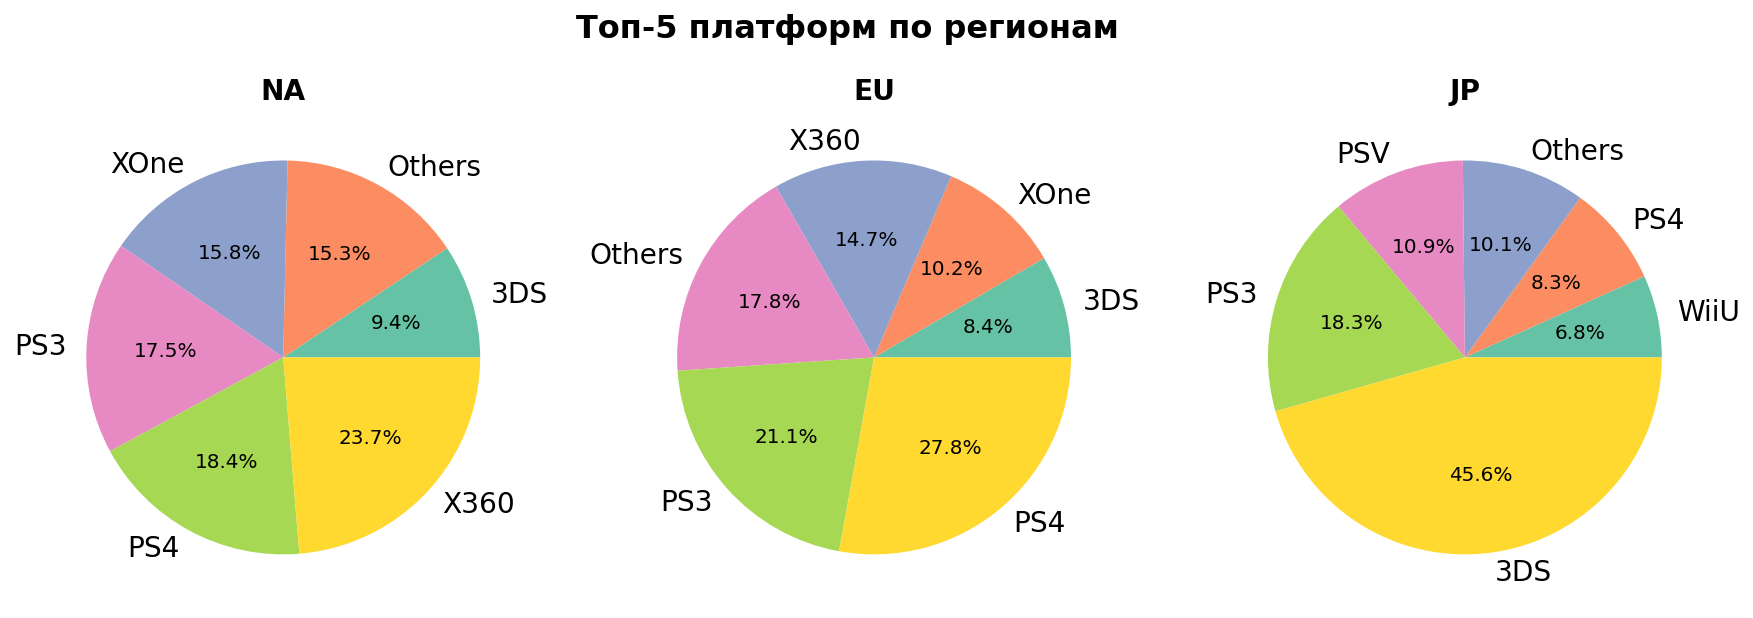

In [ ]:
# построение круговых диаграмм
build_3_pie("Топ-5 платформ по регионам")

### Топ-5 жанров  в Северной Америке, Европе и Японии

Для того, чтобы определить какие жанры предпочитают пользователи в различных регионах, нужно посчитать суммарные продажи копий по каждому жанру. Для этого воспользуемся написанной ранее функцией other_category.

In [ ]:
na = other_category('genre', 'na_sales')
eu = other_category('genre', 'eu_sales')
jp = other_category('genre', 'jp_sales')

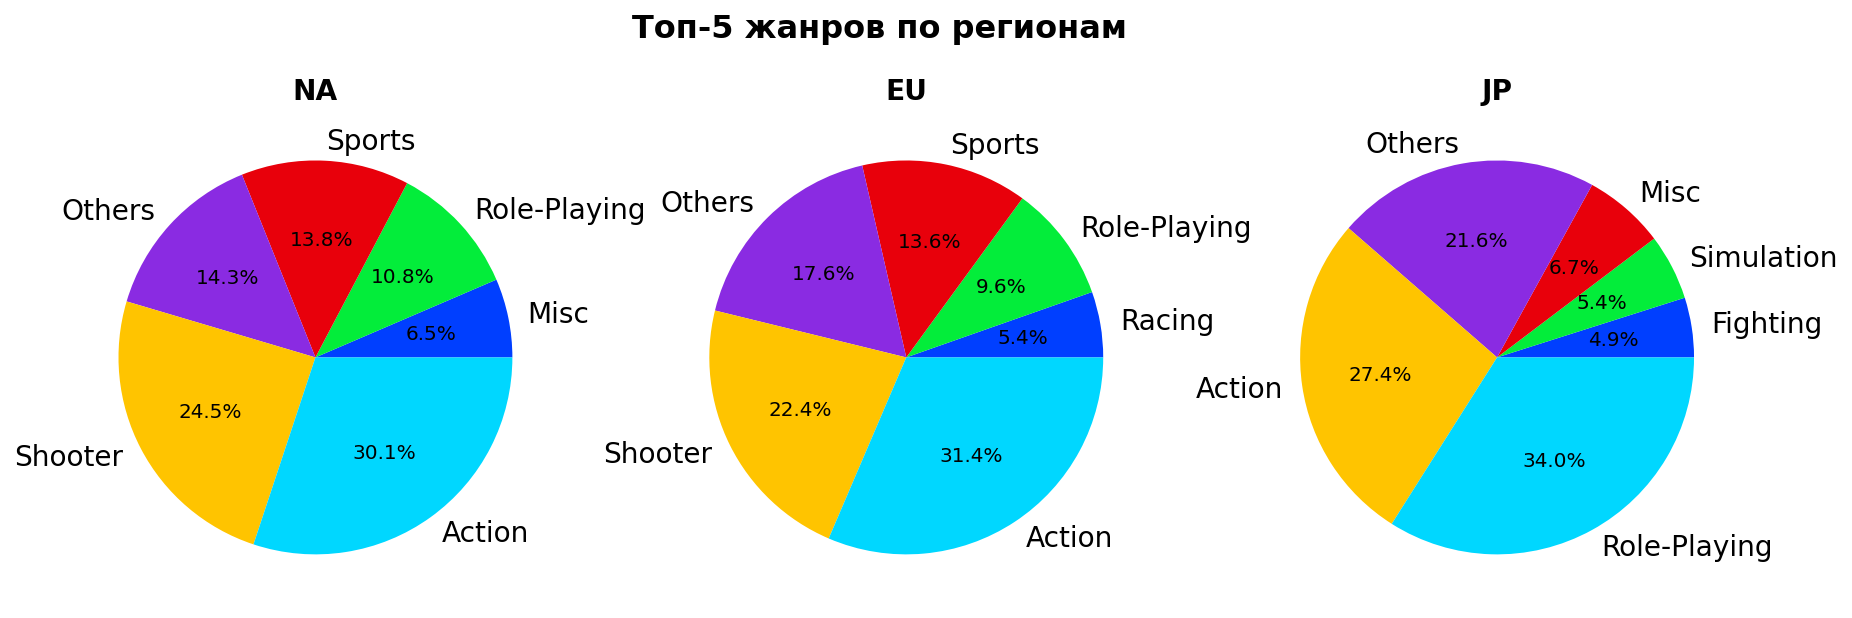

In [ ]:
# построение круговых диаграмм
build_3_pie("Топ-5 жанров по регионам")

Топ-5 игр по жанрам по продажам в Северной Америке:
1. Action - 30.1% (180.15 млн.копий)
2. Shooter - 24.5%
3. Others - 14.3%
4. Sports - 13.8%
5. Role-Playing - 10.8%.

Топ-5 игр по жанрам по продажам в Европе:
1. Action - 31.4% (161.70 млн.копий)
2. Shooter - 22.4% (113.47 млн.копий)
3. Others - 17.6%
4. Sports - 13.6% (69.09 млн.копий)
5. Role-Playing - 9.6% (48.53 млн.копий).

Топ-5 игр по жанрам по продажам в Японии:
1. Role-Playing - 34% (65.44 млн.копий)
2. Action - 27.4% (52.8 млн.копий)
3. Others - 21.6%
3. Misc - 6.7% (13.1 млн.копий)
4. Simulation - 5.4% (10.41 млн.копий).

Сравнение предпочтений по жанру игры также показывает сходные черты между пользователями Северной Америки и Европы. Первые четыре жанра в топ-5 по предпочтениям совпали - это Action, Shooter, Sports, Role-Playing. На 5м месте в Северной Америке Misc, а в Европе Racing.
У пользователей в Японии предпочтения распределились иначе. На 1м месте Role-Playing, затем идут Action, Misc, Simulation и Fighting. Различия объясняются культурными различиями и отличиями в менталитете.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Проверим долю продаж игр согласно рейтингу ESRB для каждого региона по отдельности.

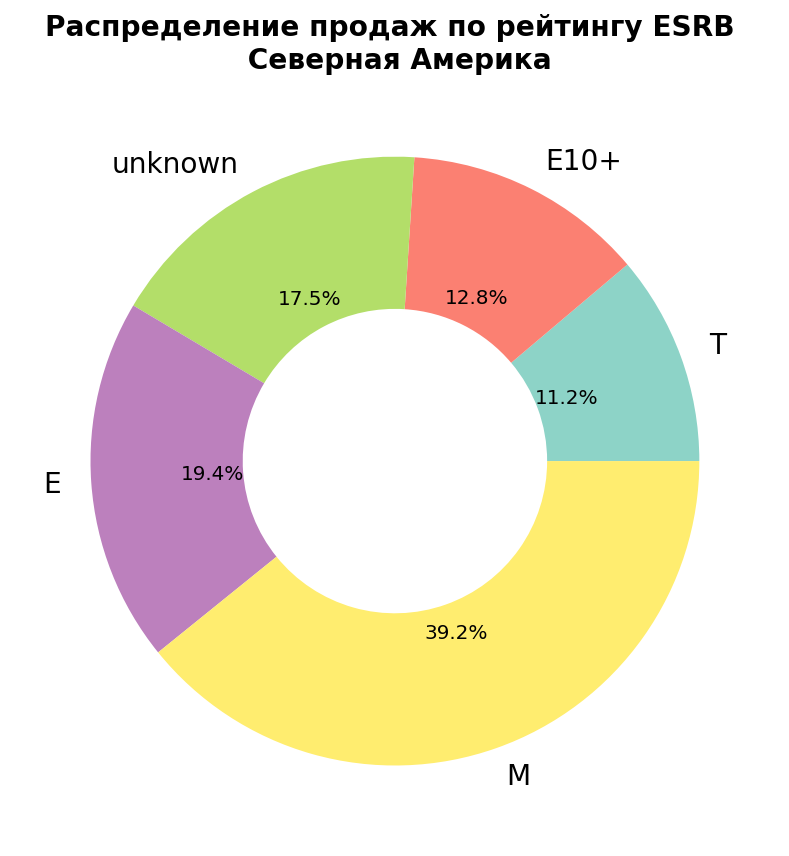

In [ ]:
# построение круговой диаграммы для Северной Америки
build_pie('rating', 'na_sales', 'по рейтингу ESRB \n Северная Америка')

В Северной Америке наибольшую долю продаж игр составляют игры категории "M" - 39%. Далее идут игры категории "Е" - 19.3%. Игры с неустановленной категорией unknown составляют довольно существенную долю 17.4%.

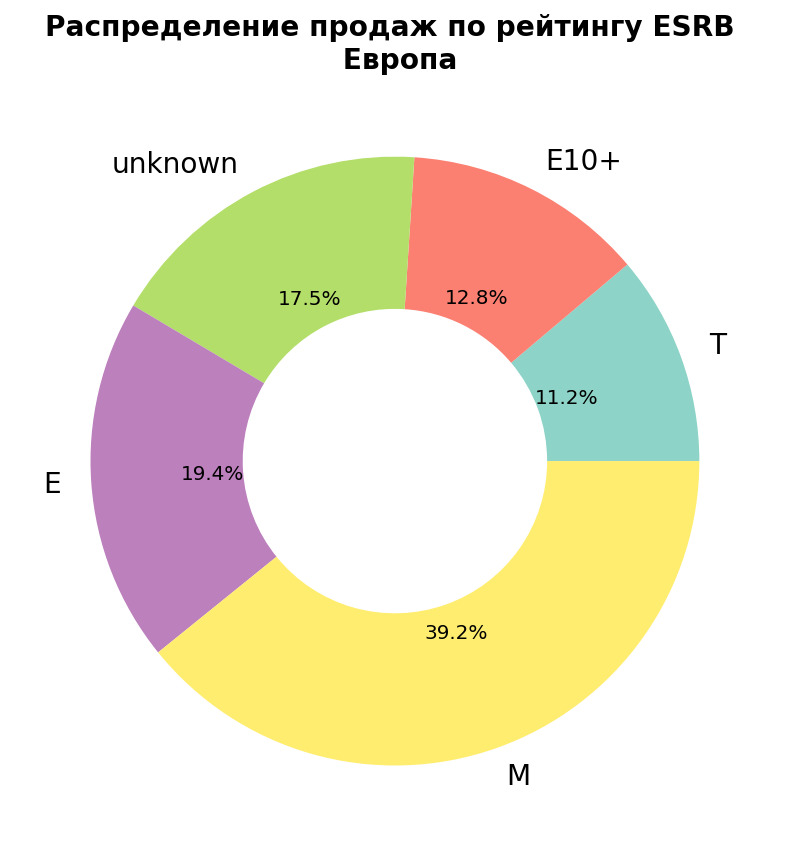

In [ ]:
# построение круговой диаграммы для Европы
build_pie('rating', 'na_sales', 'по рейтингу ESRB \n Европа')

В Европе также наиболее популярными по рейтингу ESRB являются игры категории "М" (38.2%) и "Е" (22.2%). Категория без рейтинга ESRB составляет большую долю, чем в Северной Америке, 18%.

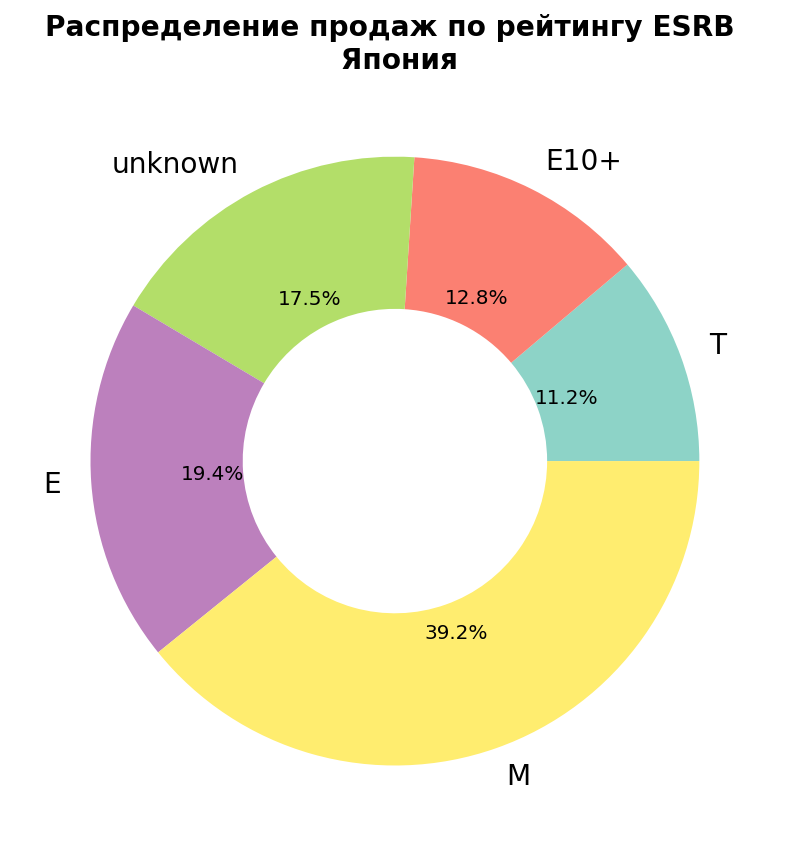

In [ ]:
# построение круговой диаграммы для Японии
build_pie('rating', 'na_sales', 'по рейтингу ESRB \n Япония')

В Японии больше половины игр (56.6%) не имеют рейтинга ESRB. Соответственно, можно сделать вывод, что данный рейтинг не влияет на продажи игр в Японии.

## Проверить гипотезы

### Гипотеза №1: Средние пользовательские рейтинги платформ XBox One и PC одинаковые

Для проверки данной гипотезы установим нулевую гипотезу (Н0) о том, что средние пользовательские рейтинги платформ XBox One и PC одинаковые. В качестве альтернативной будет двусторонняя гипотеза (Н1) о том, что они не равны.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() сначала выборку с оценками пользователей платформы XBox One, затем выборку с оценками пользователей платформы PC.
Предполагаем, что дисперсии одинаковые, поэтому дополнительный параметр equal_var=False не нужно указывать. Обе выборки достаточно большие и одинаковые по размеру, к тому же в обеих выборках измерена одна и та же величина. Параметр, определяющий альтернативную гипотезу также можно не указывать, т.к. она двусторонняя и применяется по умолчанию.

Нулевая гипотеза будет отвергнута, если средние оценки будут значимо отличаться. Установим уровень статистической значимости равным 1%.

In [ ]:
# выборки с оценками пользователей платформ XBox One и PC
XOne_user_score  = df_cut.loc[(df_cut['platform'] == "XOne") & (df_cut['user_score'] != -999), ['user_score']]
PC_user_score = df_cut.loc[(df_cut['platform'] == "PC") & (df_cut['user_score'] != -999), ['user_score']]


# установим уровень статистической значимости равным 1%
# если p-value окажется меньше него, отвергнем гипотезу
alpha = 0.01

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(XOne_user_score, PC_user_score)

print('Средняя оценка пользователей платформы XBox One:', XOne_user_score.mean())
print('Средняя оценка пользователей платформы PC:', PC_user_score.mean())
print('p-значение:', results.pvalue)

# проверяем p-value
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Средняя оценка пользователей платформы XBox One: user_score    6.521429
dtype: float64
Средняя оценка пользователей платформы PC: user_score    6.428641
dtype: float64
p-значение: [0.55350805]
Не отвергаем нулевую гипотезу


Сравнение средних значений оценок пользователей по двум платформам показывает, что средняя оценка платформы PC меньше средней оценки XBox One.
Сравнение p-value с уровнем статистической значимости также показывает, что .

Таким образом, <u>гипотеза о том, что пользовательские рейтинги платформ XBox One и PC одинаковые, подтвердилась.</u>

### Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки данной гипотезы установим нулевую гипотезу (Н0) о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые. В качестве альтернативной будет двусторонняя гипотеза (Н1) о том, что они разные.

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind() сначала выборку с оценками пользователей игр жанра Action, затем выборку с оценками пользователей игр жанра Sports.
Предполагаем, что дисперсии одинаковые, поэтому дополнительный параметр equal_var=False не нужно указывать. Обе выборки достаточно большие и одинаковые по размеру, к тому же в обеих выборках измерена одна и та же величина.

Нулевая гипотеза будет отвергнута, если средние оценки будут значимо отличаться. Установим уровень статистической значимости равным 1%.

In [ ]:
# выборки с оценками пользователей игр жанров Action и Sports
action_user_score  = df_cut.loc[(df_cut['genre'] == "Action") & (df_cut['user_score'] != -999), ['user_score']]
sports_user_score = df_cut.loc[(df_cut['genre'] == "Sports") & (df_cut['user_score'] != -999), ['user_score']]


# установим уровень статистической значимости равным 1%
# если p-value окажется меньше него, отвергнем гипотезу
alpha = 0.01

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(action_user_score, sports_user_score)

print('Средняя оценка пользователей игр жанра Action:', action_user_score.mean())
print('Средняя оценка пользователей игр жанра Sports:', sports_user_score.mean())
print('p-значение:', results.pvalue)

# проверяем p-value
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Средняя оценка пользователей игр жанра Action: user_score    6.825048
dtype: float64
Средняя оценка пользователей игр жанра Sports: user_score    5.45567
dtype: float64
p-значение: [4.80452338e-26]
Отвергаем нулевую гипотезу


**Вывод:**

Сравнение средних оценок пользователей игр показало, что средняя оценка игр жанра Action выше игр жанра Sports, 6.83 против 5.5. Сравнение рассчитанного p-value и установленного уровня статистической важности показало, что с достаточной степенью уверенности нулевая гипотеза может быть отвергнута.

Таким образом, <u>гипотеза о том, что пользовательские рейтинги жанров Action и Sports разные, подтвердилась.</u>

# Вывод

В ходе данного проекта были изучены данные по продажам видеоигр в Северной Америке, Европе и Японии.

Перед проведением анализа была сделана <u>предобработка данных</u>, в ходе которой были проведены следующие действия:
- Названия столбцов были приведены к нижнему регистру.
- Явные дубликаты не были обнаружены. Были обнаружены неявные дубликаты в столбцах name, platform, year_of_release  и удалены.
- Устаревшая категории К-А в столбце rating была заменена на "Е"
- Были преобразованы типы столбцов year_of_release, critic_score и user_score
- Были обнаружены пропуски в 6 столбцах: name, year_of_release, genre, critic_score, user_score, rating.
- Пропусков в столбцах name и genre было незначительное количество (0.01%), поэтому они были удалены
- Пропуски в столбце year_of_release были также удалены, т.к их было небольшое количество 1.6%.
- Пропуски в столбцах critic_score и user_score были заполнены числовым значением -999, которое отфильтровывалось перед анализом этих столбцов.
- Пропуски в столбце rating были заполнены значением unknown
- Был создан дополнительный столбцек с суммарными продажами по всем регионам
- Была проведена проверка изменения размерности таблицы. Количество строк уменьшилось незначительно - на 0.01%.

На этапе <u>исследовательского анализа данных</u> было изучено:
- Как менялись продажи по платформам по годам. Были выявлены характерные тренды, соответствующие различным периодам жизни платформ. После появления платформы следует резкий рост продаж в течении 3-6 лет, затем следует чуть более длительный спад в течении 5-7 лет. Таким образом, время жизни платформы от момента релиза до прекращения продаж равно 9-11 годам.
- За какой характерный период появляются новые и исчезают старые платформы. В среднем каждый год выходят новые игровые платформы и практически каждый год уходят старые платформы.
- Для дальнейшего анализа и прогноза продаж в 2017 году был выбран период 2012-2016, т.к. именно этот период характеризует текущий боковой тренд, кроме того период в 5 лет (2012-2016) охватит почти полный срок жизни платформы
- Выявлены платформы, лидирующие по продажам. Из полученного графика изменения продаж по годам видно, что продажи по всем играм находятся в падающем тренде и по большинству игр уже близки к нулю. По объёмам продаж уверенно лидирует платформа PS4. Далее по убыванию объёмов продаж идут XOne и 3DS. **Наиболее прибыльными (в порядке убывания) являются платформы X360, WiiU, Xone, PS4, PS3.**
- Определено как влияют оценки критиков и пользователей на продажи. Для анализа использовались данные по шести популярным платформам PS3, 3DS, WiiU, X360, XOne. В целом связь между продажами и оценками пользователей и критиков слабая, т.к. на продажи влияют и другие параметры.
- Распределение продаж игр по жанрам. Наибольшая доля игр выпущена в жанре Action - 35.9%. Далее по убыванию идут Role-Playing (12.8%), Adventure (10.4%) и другие. Наибольшие продажи также делают игры жанра Action - это 446.41 млн проданных копий. Далее по убыванию продаж идут игры жанра Shooter (304.75 млн проданных копий), Role-Playing (192.8 млн проданных копий) и Sports (181.07 млн проданных копий). Наименее продаваемыми являются Strategy (13.34 млн проданных копий) и Puzzle (4.89 млн проданных копий). **Наиболее прибыльными (в порядке убывания) являются игры жанра Shooter, Sports, Platform, Role-Playing и Racing.**

Был оценен объем рынка в зависимости от региона. В Северной Америке было продано больше всего игр - 590.97 млн копий, чуть меньше в Европе (506.81 млн копий) и в 3 раза меньше в Японии (192.58 млн копий). Вероятнее всего это связано с большой разницей в численности населения этих регионов.
Был составлен портрет пользователя в Северной Америке, Европе и Японии:

Пользователи в **Северной Америке** предпочитают следующие платформы в порядке убывания популярности: X360, PS4, PS3, XOne, 3DS.
Наиболее популярными жанрами игр для них являются Action, Shooter, Sports, Role-Playing и Misc.
Наибольшую долю продаж игр составляют игры категории "M" - 39%. Далее идут игры категории "Е" - 19.3%. Игры с неустановленной категорией unknown составляют довольно существенную долю 17.4%.

Пользователи в **Европе** предпочитают следующие платформы в порядке убывания популярности: PS4, PS3, X360, XOne, 3DS.
Наиболее популярными жанрами игр для них являются Action, Shooter, Sports, Role-Playing и Racing.
Наиболее популярными по рейтингу ESRB являются игры категории "М" (38.2%) и "Е" (22.2%). Категория без рейтинга ESRB составляет большую долю, чем в Северной Америке, 18%.

Пользователи в **Японии** предпочитают следующие платформы в порядке убывания популярности: 3DS, PS3, PSV, PS4 и WiiU.
Наиболее популярными жанрами игр для них являются Role-Playing, Action, Misc, Simulation и Fighting.
В Японии больше половины игр (56.6%) не имеют рейтинга ESRB. Соответственно, можно сделать вывод, что данный рейтинг не влияет на продажи игр в Японии.

**Проверены гипотезы:**
- Средние пользовательские рейтинги платформ XBox One и PC одинаковые. <u>~Не~ подтвердилась.</u>
- Средние пользовательские рейтинги жанров Action и Sports разные. <u>~Не~ подтвердилась.</u>

**Таким образом, при прогнозе продаж необходимо учитывать платформу, жанр игры, особенности региона, в котором планируются продажи. Оценки пользователей и критиков не играют существенной роли.**

**Рекомендации по планированию рекламной кампании на 2017 год:**

- **Регион:** Северная Америка, т.к. на него приходится больше всего продаж.
- **Платформа:** Х360, т.к. она наиболее популярная в Северной Америке и является наиболее продаваемой.
- **Жанр:** Shooter, т.к. 24.5% пользователей (2е место в топ-5) в Северной Америке предпочитают его и этот жанр является наиболее прибыльным.
- **Рейтинг ESRB:** "M", т.е. «Для взрослых», т.к. 39.2% всех продаж в Северной Америке приходится на эту категорию.
- **Рейтинг критиков:** Не ниже 50, а лучше выше 70. Не является определяющим фактором при выборе игры.
- **Рейтинг пользователей:** Выше 4. Не является определяющим фактором при выборе игры.